In [1]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pydot

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.64,784.0,343.0,220.5,3.5,3,0.1,3,15.36,19.18
1,0.62,808.5,367.5,220.5,3.5,4,0.1,3,12.71,14.14
2,0.62,808.5,367.5,220.5,3.5,5,0.1,5,12.62,14.15
3,0.69,735.0,294.0,220.5,3.5,5,0.1,4,11.20,14.73
4,0.74,686.0,245.0,220.5,3.5,4,0.4,5,14.17,16.94


In [3]:
#getting some statistics
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Preparing the data

In [4]:
#Train test split
x_train, x_test = train_test_split(df, test_size = 0.2)

#train labels
Y1_train = np.array(x_train["Y1"])
Y2_train = np.array(x_train["Y2"])

#test labels
Y1_test = np.array(x_test["Y1"])
Y2_test = np.array(x_test["Y2"])

#remove the labels from the dataset
x_train.drop(["Y1","Y2"], axis = 1, inplace = True)
x_test.drop(["Y1","Y2"], axis = 1, inplace = True)

#Normalizing the data set
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()

/home/gil/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Building the model

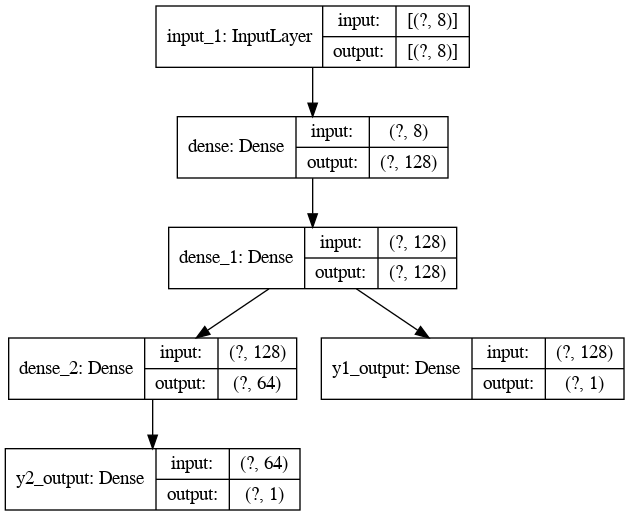

In [5]:
# defining layers
input_layer = Input(shape=(len(x_train.columns)))
dense_layer_1 = Dense(units = 128, activation = "relu")(input_layer) 
dense_layer_2 = Dense(units = 128, activation = "relu")(dense_layer_1)
dense_layer_3 = Dense(units = 64, activation = "relu")(dense_layer_2)

#Y1 output
y1_output = Dense(units = 1, activation = "linear", name = "y1_output")(dense_layer_2)

#Y2 output
y2_output = Dense(units = 1, activation = "linear", name = "y2_output")(dense_layer_3)

#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

#specify the optimizer and compile with the loss function for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer = optimizer,
              loss = {'y1_output':'mse', 'y2_output':'mse'},
              metrics = {
                  'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                  'y2_output':tf.keras.metrics.RootMeanSquaredError(),
              }
             )
plot_model(model, show_shapes=True )

In [6]:
#training process
history = model.fit(x_train_norm, (Y1_train, Y2_train), epochs = 2000, batch_size = 10,
                    validation_data = (x_test_norm, (Y1_test, Y2_test)))

Epoch 1/2000
62/62 [==============================] - 0s 5ms/step - loss: 240.9582 - y1_output_loss: 120.8536 - y2_output_loss: 120.1046 - y1_output_root_mean_squared_error: 10.9933 - y2_output_root_mean_squared_error: 10.9592 - val_loss: 57.5762 - val_y1_output_loss: 20.7328 - val_y2_output_loss: 36.8434 - val_y1_output_root_mean_squared_error: 4.5533 - val_y2_output_root_mean_squared_error: 6.0699
Epoch 2/2000
62/62 [==============================] - 0s 2ms/step - loss: 30.9215 - y1_output_loss: 12.0323 - y2_output_loss: 18.8892 - y1_output_root_mean_squared_error: 3.4688 - y2_output_root_mean_squared_error: 4.3462 - val_loss: 47.4717 - val_y1_output_loss: 14.8542 - val_y2_output_loss: 32.6175 - val_y1_output_root_mean_squared_error: 3.8541 - val_y2_output_root_mean_squared_error: 5.7112
Epoch 3/2000
62/62 [==============================] - 0s 2ms/step - loss: 27.7127 - y1_output_loss: 10.6060 - y2_output_loss: 17.1067 - y1_output_root_mean_squared_error: 3.2567 - y2_output_root_mean

Epoch 22/2000
62/62 [==============================] - 0s 2ms/step - loss: 13.6628 - y1_output_loss: 5.4047 - y2_output_loss: 8.2582 - y1_output_root_mean_squared_error: 2.3248 - y2_output_root_mean_squared_error: 2.8737 - val_loss: 13.1184 - val_y1_output_loss: 5.6980 - val_y2_output_loss: 7.4205 - val_y1_output_root_mean_squared_error: 2.3870 - val_y2_output_root_mean_squared_error: 2.7241
Epoch 23/2000
62/62 [==============================] - 0s 2ms/step - loss: 15.9411 - y1_output_loss: 5.5421 - y2_output_loss: 10.3990 - y1_output_root_mean_squared_error: 2.3542 - y2_output_root_mean_squared_error: 3.2247 - val_loss: 24.9008 - val_y1_output_loss: 7.2645 - val_y2_output_loss: 17.6363 - val_y1_output_root_mean_squared_error: 2.6953 - val_y2_output_root_mean_squared_error: 4.1996
Epoch 24/2000
62/62 [==============================] - 0s 1ms/step - loss: 14.9584 - y1_output_loss: 5.3075 - y2_output_loss: 9.6509 - y1_output_root_mean_squared_error: 2.3038 - y2_output_root_mean_squared_e

Epoch 43/2000
62/62 [==============================] - 0s 2ms/step - loss: 8.2241 - y1_output_loss: 2.5427 - y2_output_loss: 5.6814 - y1_output_root_mean_squared_error: 1.5946 - y2_output_root_mean_squared_error: 2.3836 - val_loss: 16.3084 - val_y1_output_loss: 5.8893 - val_y2_output_loss: 10.4191 - val_y1_output_root_mean_squared_error: 2.4268 - val_y2_output_root_mean_squared_error: 3.2279
Epoch 44/2000
62/62 [==============================] - 0s 2ms/step - loss: 9.8151 - y1_output_loss: 3.0666 - y2_output_loss: 6.7485 - y1_output_root_mean_squared_error: 1.7512 - y2_output_root_mean_squared_error: 2.5978 - val_loss: 19.5209 - val_y1_output_loss: 7.8585 - val_y2_output_loss: 11.6623 - val_y1_output_root_mean_squared_error: 2.8033 - val_y2_output_root_mean_squared_error: 3.4150
Epoch 45/2000
62/62 [==============================] - 0s 2ms/step - loss: 8.8447 - y1_output_loss: 2.6554 - y2_output_loss: 6.1892 - y1_output_root_mean_squared_error: 1.6296 - y2_output_root_mean_squared_erro

Epoch 64/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.2893 - y1_output_loss: 1.4489 - y2_output_loss: 3.8404 - y1_output_root_mean_squared_error: 1.2037 - y2_output_root_mean_squared_error: 1.9597 - val_loss: 5.4854 - val_y1_output_loss: 2.0410 - val_y2_output_loss: 3.4444 - val_y1_output_root_mean_squared_error: 1.4286 - val_y2_output_root_mean_squared_error: 1.8559
Epoch 65/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.3892 - y1_output_loss: 1.3697 - y2_output_loss: 4.0196 - y1_output_root_mean_squared_error: 1.1703 - y2_output_root_mean_squared_error: 2.0049 - val_loss: 6.9904 - val_y1_output_loss: 2.4121 - val_y2_output_loss: 4.5783 - val_y1_output_root_mean_squared_error: 1.5531 - val_y2_output_root_mean_squared_error: 2.1397
Epoch 66/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.8142 - y1_output_loss: 1.1882 - y2_output_loss: 3.6259 - y1_output_root_mean_squared_error: 1.0901 - y2_output_root_mean_squared_error: 1

Epoch 85/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5165 - y1_output_loss: 0.8442 - y2_output_loss: 2.6722 - y1_output_root_mean_squared_error: 0.9188 - y2_output_root_mean_squared_error: 1.6347 - val_loss: 6.2377 - val_y1_output_loss: 1.5536 - val_y2_output_loss: 4.6842 - val_y1_output_root_mean_squared_error: 1.2464 - val_y2_output_root_mean_squared_error: 2.1643
Epoch 86/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.0534 - y1_output_loss: 0.9689 - y2_output_loss: 3.0845 - y1_output_root_mean_squared_error: 0.9843 - y2_output_root_mean_squared_error: 1.7563 - val_loss: 23.5817 - val_y1_output_loss: 5.4125 - val_y2_output_loss: 18.1693 - val_y1_output_root_mean_squared_error: 2.3265 - val_y2_output_root_mean_squared_error: 4.2625
Epoch 87/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.8507 - y1_output_loss: 0.8872 - y2_output_loss: 2.9635 - y1_output_root_mean_squared_error: 0.9419 - y2_output_root_mean_squared_error:

Epoch 106/2000
62/62 [==============================] - 0s 2ms/step - loss: 2.3017 - y1_output_loss: 0.5165 - y2_output_loss: 1.7851 - y1_output_root_mean_squared_error: 0.7187 - y2_output_root_mean_squared_error: 1.3361 - val_loss: 5.7285 - val_y1_output_loss: 1.5815 - val_y2_output_loss: 4.1469 - val_y1_output_root_mean_squared_error: 1.2576 - val_y2_output_root_mean_squared_error: 2.0364
Epoch 107/2000
62/62 [==============================] - 0s 2ms/step - loss: 2.0451 - y1_output_loss: 0.4601 - y2_output_loss: 1.5850 - y1_output_root_mean_squared_error: 0.6783 - y2_output_root_mean_squared_error: 1.2590 - val_loss: 4.0170 - val_y1_output_loss: 1.2889 - val_y2_output_loss: 2.7281 - val_y1_output_root_mean_squared_error: 1.1353 - val_y2_output_root_mean_squared_error: 1.6517
Epoch 108/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5655 - y1_output_loss: 0.8497 - y2_output_loss: 2.7158 - y1_output_root_mean_squared_error: 0.9218 - y2_output_root_mean_squared_error

Epoch 127/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.9998 - y1_output_loss: 0.4050 - y2_output_loss: 1.5948 - y1_output_root_mean_squared_error: 0.6364 - y2_output_root_mean_squared_error: 1.2629 - val_loss: 3.5520 - val_y1_output_loss: 1.0756 - val_y2_output_loss: 2.4764 - val_y1_output_root_mean_squared_error: 1.0371 - val_y2_output_root_mean_squared_error: 1.5737
Epoch 128/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.8860 - y1_output_loss: 0.3896 - y2_output_loss: 1.4964 - y1_output_root_mean_squared_error: 0.6242 - y2_output_root_mean_squared_error: 1.2233 - val_loss: 3.1316 - val_y1_output_loss: 0.7816 - val_y2_output_loss: 2.3500 - val_y1_output_root_mean_squared_error: 0.8841 - val_y2_output_root_mean_squared_error: 1.5330
Epoch 129/2000
62/62 [==============================] - 0s 1ms/step - loss: 1.7767 - y1_output_loss: 0.3712 - y2_output_loss: 1.4055 - y1_output_root_mean_squared_error: 0.6093 - y2_output_root_mean_squared_error

Epoch 148/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.4103 - y1_output_loss: 0.3373 - y2_output_loss: 1.0731 - y1_output_root_mean_squared_error: 0.5807 - y2_output_root_mean_squared_error: 1.0359 - val_loss: 6.5562 - val_y1_output_loss: 1.6207 - val_y2_output_loss: 4.9356 - val_y1_output_root_mean_squared_error: 1.2731 - val_y2_output_root_mean_squared_error: 2.2216
Epoch 149/2000
62/62 [==============================] - 0s 1ms/step - loss: 2.1617 - y1_output_loss: 0.4785 - y2_output_loss: 1.6832 - y1_output_root_mean_squared_error: 0.6918 - y2_output_root_mean_squared_error: 1.2974 - val_loss: 13.2292 - val_y1_output_loss: 2.9377 - val_y2_output_loss: 10.2915 - val_y1_output_root_mean_squared_error: 1.7140 - val_y2_output_root_mean_squared_error: 3.2080
Epoch 150/2000
62/62 [==============================] - 0s 2ms/step - loss: 2.2970 - y1_output_loss: 0.4968 - y2_output_loss: 1.8002 - y1_output_root_mean_squared_error: 0.7048 - y2_output_root_mean_squared_err

Epoch 169/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.2701 - y1_output_loss: 0.2894 - y2_output_loss: 0.9807 - y1_output_root_mean_squared_error: 0.5380 - y2_output_root_mean_squared_error: 0.9903 - val_loss: 3.2518 - val_y1_output_loss: 0.8752 - val_y2_output_loss: 2.3766 - val_y1_output_root_mean_squared_error: 0.9355 - val_y2_output_root_mean_squared_error: 1.5416
Epoch 170/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.4095 - y1_output_loss: 0.3116 - y2_output_loss: 1.0979 - y1_output_root_mean_squared_error: 0.5583 - y2_output_root_mean_squared_error: 1.0478 - val_loss: 21.3113 - val_y1_output_loss: 4.7851 - val_y2_output_loss: 16.5262 - val_y1_output_root_mean_squared_error: 2.1875 - val_y2_output_root_mean_squared_error: 4.0652
Epoch 171/2000
62/62 [==============================] - 0s 2ms/step - loss: 2.6271 - y1_output_loss: 0.4782 - y2_output_loss: 2.1489 - y1_output_root_mean_squared_error: 0.6915 - y2_output_root_mean_squared_err

Epoch 190/2000
62/62 [==============================] - 0s 1ms/step - loss: 1.2376 - y1_output_loss: 0.2557 - y2_output_loss: 0.9818 - y1_output_root_mean_squared_error: 0.5057 - y2_output_root_mean_squared_error: 0.9909 - val_loss: 4.6677 - val_y1_output_loss: 1.6144 - val_y2_output_loss: 3.0533 - val_y1_output_root_mean_squared_error: 1.2706 - val_y2_output_root_mean_squared_error: 1.7474
Epoch 191/2000
62/62 [==============================] - 0s 1ms/step - loss: 1.1102 - y1_output_loss: 0.2796 - y2_output_loss: 0.8306 - y1_output_root_mean_squared_error: 0.5288 - y2_output_root_mean_squared_error: 0.9114 - val_loss: 3.4699 - val_y1_output_loss: 0.7554 - val_y2_output_loss: 2.7145 - val_y1_output_root_mean_squared_error: 0.8691 - val_y2_output_root_mean_squared_error: 1.6476
Epoch 192/2000
62/62 [==============================] - 0s 1ms/step - loss: 1.1563 - y1_output_loss: 0.2622 - y2_output_loss: 0.8941 - y1_output_root_mean_squared_error: 0.5121 - y2_output_root_mean_squared_error

Epoch 211/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.2208 - y1_output_loss: 0.2733 - y2_output_loss: 0.9474 - y1_output_root_mean_squared_error: 0.5228 - y2_output_root_mean_squared_error: 0.9734 - val_loss: 4.4644 - val_y1_output_loss: 1.4780 - val_y2_output_loss: 2.9864 - val_y1_output_root_mean_squared_error: 1.2157 - val_y2_output_root_mean_squared_error: 1.7281
Epoch 212/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.0565 - y1_output_loss: 0.2292 - y2_output_loss: 0.8273 - y1_output_root_mean_squared_error: 0.4788 - y2_output_root_mean_squared_error: 0.9096 - val_loss: 3.2256 - val_y1_output_loss: 0.8598 - val_y2_output_loss: 2.3658 - val_y1_output_root_mean_squared_error: 0.9273 - val_y2_output_root_mean_squared_error: 1.5381
Epoch 213/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.1703 - y1_output_loss: 0.2388 - y2_output_loss: 0.9315 - y1_output_root_mean_squared_error: 0.4887 - y2_output_root_mean_squared_error

Epoch 232/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.0241 - y1_output_loss: 0.2194 - y2_output_loss: 0.8047 - y1_output_root_mean_squared_error: 0.4684 - y2_output_root_mean_squared_error: 0.8970 - val_loss: 6.8532 - val_y1_output_loss: 1.3550 - val_y2_output_loss: 5.4982 - val_y1_output_root_mean_squared_error: 1.1640 - val_y2_output_root_mean_squared_error: 2.3448
Epoch 233/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.0821 - y1_output_loss: 0.2193 - y2_output_loss: 0.8627 - y1_output_root_mean_squared_error: 0.4683 - y2_output_root_mean_squared_error: 0.9288 - val_loss: 2.9924 - val_y1_output_loss: 0.8570 - val_y2_output_loss: 2.1354 - val_y1_output_root_mean_squared_error: 0.9257 - val_y2_output_root_mean_squared_error: 1.4613
Epoch 234/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.9413 - y1_output_loss: 0.2130 - y2_output_loss: 0.7283 - y1_output_root_mean_squared_error: 0.4615 - y2_output_root_mean_squared_error

Epoch 253/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.0182 - y1_output_loss: 0.2317 - y2_output_loss: 0.7864 - y1_output_root_mean_squared_error: 0.4814 - y2_output_root_mean_squared_error: 0.8868 - val_loss: 3.7440 - val_y1_output_loss: 1.3607 - val_y2_output_loss: 2.3833 - val_y1_output_root_mean_squared_error: 1.1665 - val_y2_output_root_mean_squared_error: 1.5438
Epoch 254/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.8110 - y1_output_loss: 0.1892 - y2_output_loss: 0.6218 - y1_output_root_mean_squared_error: 0.4349 - y2_output_root_mean_squared_error: 0.7886 - val_loss: 4.3821 - val_y1_output_loss: 0.8566 - val_y2_output_loss: 3.5255 - val_y1_output_root_mean_squared_error: 0.9255 - val_y2_output_root_mean_squared_error: 1.8776
Epoch 255/2000
62/62 [==============================] - 0s 2ms/step - loss: 2.0651 - y1_output_loss: 0.4676 - y2_output_loss: 1.5976 - y1_output_root_mean_squared_error: 0.6838 - y2_output_root_mean_squared_error

Epoch 274/2000
62/62 [==============================] - 0s 2ms/step - loss: 1.0407 - y1_output_loss: 0.2196 - y2_output_loss: 0.8211 - y1_output_root_mean_squared_error: 0.4687 - y2_output_root_mean_squared_error: 0.9062 - val_loss: 3.3675 - val_y1_output_loss: 0.7902 - val_y2_output_loss: 2.5773 - val_y1_output_root_mean_squared_error: 0.8890 - val_y2_output_root_mean_squared_error: 1.6054
Epoch 275/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.7741 - y1_output_loss: 0.1885 - y2_output_loss: 0.5856 - y1_output_root_mean_squared_error: 0.4341 - y2_output_root_mean_squared_error: 0.7653 - val_loss: 3.3002 - val_y1_output_loss: 0.9168 - val_y2_output_loss: 2.3834 - val_y1_output_root_mean_squared_error: 0.9575 - val_y2_output_root_mean_squared_error: 1.5438
Epoch 276/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.8974 - y1_output_loss: 0.1978 - y2_output_loss: 0.6996 - y1_output_root_mean_squared_error: 0.4447 - y2_output_root_mean_squared_error

Epoch 295/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.9886 - y1_output_loss: 0.2138 - y2_output_loss: 0.7747 - y1_output_root_mean_squared_error: 0.4624 - y2_output_root_mean_squared_error: 0.8802 - val_loss: 5.8301 - val_y1_output_loss: 0.7830 - val_y2_output_loss: 5.0471 - val_y1_output_root_mean_squared_error: 0.8849 - val_y2_output_root_mean_squared_error: 2.2466
Epoch 296/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.8585 - y1_output_loss: 0.1818 - y2_output_loss: 0.6767 - y1_output_root_mean_squared_error: 0.4264 - y2_output_root_mean_squared_error: 0.8226 - val_loss: 2.7187 - val_y1_output_loss: 0.6694 - val_y2_output_loss: 2.0493 - val_y1_output_root_mean_squared_error: 0.8182 - val_y2_output_root_mean_squared_error: 1.4315
Epoch 297/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.8731 - y1_output_loss: 0.1964 - y2_output_loss: 0.6767 - y1_output_root_mean_squared_error: 0.4432 - y2_output_root_mean_squared_error

Epoch 316/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.6948 - y1_output_loss: 0.1858 - y2_output_loss: 0.5091 - y1_output_root_mean_squared_error: 0.4310 - y2_output_root_mean_squared_error: 0.7135 - val_loss: 3.9671 - val_y1_output_loss: 0.7979 - val_y2_output_loss: 3.1692 - val_y1_output_root_mean_squared_error: 0.8932 - val_y2_output_root_mean_squared_error: 1.7802
Epoch 317/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.7231 - y1_output_loss: 0.1706 - y2_output_loss: 0.5525 - y1_output_root_mean_squared_error: 0.4130 - y2_output_root_mean_squared_error: 0.7433 - val_loss: 3.0347 - val_y1_output_loss: 0.7431 - val_y2_output_loss: 2.2916 - val_y1_output_root_mean_squared_error: 0.8620 - val_y2_output_root_mean_squared_error: 1.5138
Epoch 318/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6207 - y1_output_loss: 0.1617 - y2_output_loss: 0.4590 - y1_output_root_mean_squared_error: 0.4021 - y2_output_root_mean_squared_error

Epoch 337/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6260 - y1_output_loss: 0.1453 - y2_output_loss: 0.4807 - y1_output_root_mean_squared_error: 0.3812 - y2_output_root_mean_squared_error: 0.6933 - val_loss: 2.9582 - val_y1_output_loss: 0.7183 - val_y2_output_loss: 2.2399 - val_y1_output_root_mean_squared_error: 0.8476 - val_y2_output_root_mean_squared_error: 1.4966
Epoch 338/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6964 - y1_output_loss: 0.1597 - y2_output_loss: 0.5367 - y1_output_root_mean_squared_error: 0.3996 - y2_output_root_mean_squared_error: 0.7326 - val_loss: 2.7130 - val_y1_output_loss: 0.7447 - val_y2_output_loss: 1.9683 - val_y1_output_root_mean_squared_error: 0.8630 - val_y2_output_root_mean_squared_error: 1.4030
Epoch 339/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.9980 - y1_output_loss: 0.2171 - y2_output_loss: 0.7809 - y1_output_root_mean_squared_error: 0.4659 - y2_output_root_mean_squared_error

Epoch 358/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.5798 - y1_output_loss: 0.1608 - y2_output_loss: 0.4190 - y1_output_root_mean_squared_error: 0.4010 - y2_output_root_mean_squared_error: 0.6473 - val_loss: 3.6989 - val_y1_output_loss: 1.1846 - val_y2_output_loss: 2.5143 - val_y1_output_root_mean_squared_error: 1.0884 - val_y2_output_root_mean_squared_error: 1.5856
Epoch 359/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6281 - y1_output_loss: 0.1671 - y2_output_loss: 0.4610 - y1_output_root_mean_squared_error: 0.4088 - y2_output_root_mean_squared_error: 0.6789 - val_loss: 3.0253 - val_y1_output_loss: 0.6620 - val_y2_output_loss: 2.3632 - val_y1_output_root_mean_squared_error: 0.8136 - val_y2_output_root_mean_squared_error: 1.5373
Epoch 360/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.7713 - y1_output_loss: 0.1492 - y2_output_loss: 0.6220 - y1_output_root_mean_squared_error: 0.3863 - y2_output_root_mean_squared_error

Epoch 379/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.6092 - y1_output_loss: 0.1694 - y2_output_loss: 0.4398 - y1_output_root_mean_squared_error: 0.4115 - y2_output_root_mean_squared_error: 0.6632 - val_loss: 3.2677 - val_y1_output_loss: 0.9613 - val_y2_output_loss: 2.3065 - val_y1_output_root_mean_squared_error: 0.9804 - val_y2_output_root_mean_squared_error: 1.5187
Epoch 380/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.5308 - y1_output_loss: 0.1450 - y2_output_loss: 0.3859 - y1_output_root_mean_squared_error: 0.3808 - y2_output_root_mean_squared_error: 0.6212 - val_loss: 2.5731 - val_y1_output_loss: 0.5719 - val_y2_output_loss: 2.0013 - val_y1_output_root_mean_squared_error: 0.7562 - val_y2_output_root_mean_squared_error: 1.4147
Epoch 381/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6560 - y1_output_loss: 0.1814 - y2_output_loss: 0.4746 - y1_output_root_mean_squared_error: 0.4259 - y2_output_root_mean_squared_error

Epoch 400/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.5822 - y1_output_loss: 0.1685 - y2_output_loss: 0.4136 - y1_output_root_mean_squared_error: 0.4105 - y2_output_root_mean_squared_error: 0.6431 - val_loss: 3.5296 - val_y1_output_loss: 0.9206 - val_y2_output_loss: 2.6090 - val_y1_output_root_mean_squared_error: 0.9595 - val_y2_output_root_mean_squared_error: 1.6152
Epoch 401/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.5811 - y1_output_loss: 0.1534 - y2_output_loss: 0.4277 - y1_output_root_mean_squared_error: 0.3916 - y2_output_root_mean_squared_error: 0.6540 - val_loss: 3.7077 - val_y1_output_loss: 0.8183 - val_y2_output_loss: 2.8894 - val_y1_output_root_mean_squared_error: 0.9046 - val_y2_output_root_mean_squared_error: 1.6998
Epoch 402/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6238 - y1_output_loss: 0.1523 - y2_output_loss: 0.4715 - y1_output_root_mean_squared_error: 0.3902 - y2_output_root_mean_squared_error

Epoch 421/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.4474 - y1_output_loss: 0.1352 - y2_output_loss: 0.3122 - y1_output_root_mean_squared_error: 0.3677 - y2_output_root_mean_squared_error: 0.5587 - val_loss: 3.0678 - val_y1_output_loss: 0.8946 - val_y2_output_loss: 2.1732 - val_y1_output_root_mean_squared_error: 0.9459 - val_y2_output_root_mean_squared_error: 1.4742
Epoch 422/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.5896 - y1_output_loss: 0.1511 - y2_output_loss: 0.4385 - y1_output_root_mean_squared_error: 0.3887 - y2_output_root_mean_squared_error: 0.6622 - val_loss: 2.7173 - val_y1_output_loss: 0.7386 - val_y2_output_loss: 1.9787 - val_y1_output_root_mean_squared_error: 0.8594 - val_y2_output_root_mean_squared_error: 1.4066
Epoch 423/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.4480 - y1_output_loss: 0.1301 - y2_output_loss: 0.3179 - y1_output_root_mean_squared_error: 0.3606 - y2_output_root_mean_squared_error

Epoch 442/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.4371 - y1_output_loss: 0.1346 - y2_output_loss: 0.3025 - y1_output_root_mean_squared_error: 0.3669 - y2_output_root_mean_squared_error: 0.5500 - val_loss: 5.1697 - val_y1_output_loss: 1.1697 - val_y2_output_loss: 4.0001 - val_y1_output_root_mean_squared_error: 1.0815 - val_y2_output_root_mean_squared_error: 2.0000
Epoch 443/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.5188 - y1_output_loss: 0.1353 - y2_output_loss: 0.3835 - y1_output_root_mean_squared_error: 0.3678 - y2_output_root_mean_squared_error: 0.6193 - val_loss: 2.4505 - val_y1_output_loss: 0.6062 - val_y2_output_loss: 1.8443 - val_y1_output_root_mean_squared_error: 0.7786 - val_y2_output_root_mean_squared_error: 1.3581
Epoch 444/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.3760 - y1_output_loss: 0.1191 - y2_output_loss: 0.2568 - y1_output_root_mean_squared_error: 0.3452 - y2_output_root_mean_squared_error

Epoch 463/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3766 - y1_output_loss: 0.1244 - y2_output_loss: 0.2522 - y1_output_root_mean_squared_error: 0.3527 - y2_output_root_mean_squared_error: 0.5022 - val_loss: 2.8613 - val_y1_output_loss: 0.9012 - val_y2_output_loss: 1.9601 - val_y1_output_root_mean_squared_error: 0.9493 - val_y2_output_root_mean_squared_error: 1.4000
Epoch 464/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.5603 - y1_output_loss: 0.1411 - y2_output_loss: 0.4192 - y1_output_root_mean_squared_error: 0.3756 - y2_output_root_mean_squared_error: 0.6474 - val_loss: 2.6300 - val_y1_output_loss: 0.6169 - val_y2_output_loss: 2.0131 - val_y1_output_root_mean_squared_error: 0.7854 - val_y2_output_root_mean_squared_error: 1.4188
Epoch 465/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.4067 - y1_output_loss: 0.1331 - y2_output_loss: 0.2736 - y1_output_root_mean_squared_error: 0.3649 - y2_output_root_mean_squared_error

Epoch 484/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.4212 - y1_output_loss: 0.1302 - y2_output_loss: 0.2909 - y1_output_root_mean_squared_error: 0.3609 - y2_output_root_mean_squared_error: 0.5394 - val_loss: 2.9020 - val_y1_output_loss: 0.9172 - val_y2_output_loss: 1.9847 - val_y1_output_root_mean_squared_error: 0.9577 - val_y2_output_root_mean_squared_error: 1.4088
Epoch 485/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.3168 - y1_output_loss: 0.1153 - y2_output_loss: 0.2015 - y1_output_root_mean_squared_error: 0.3396 - y2_output_root_mean_squared_error: 0.4489 - val_loss: 2.9699 - val_y1_output_loss: 0.8882 - val_y2_output_loss: 2.0817 - val_y1_output_root_mean_squared_error: 0.9425 - val_y2_output_root_mean_squared_error: 1.4428
Epoch 486/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3642 - y1_output_loss: 0.1309 - y2_output_loss: 0.2333 - y1_output_root_mean_squared_error: 0.3619 - y2_output_root_mean_squared_error

Epoch 505/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3752 - y1_output_loss: 0.1038 - y2_output_loss: 0.2714 - y1_output_root_mean_squared_error: 0.3221 - y2_output_root_mean_squared_error: 0.5209 - val_loss: 2.4195 - val_y1_output_loss: 0.6355 - val_y2_output_loss: 1.7840 - val_y1_output_root_mean_squared_error: 0.7972 - val_y2_output_root_mean_squared_error: 1.3357
Epoch 506/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2996 - y1_output_loss: 0.1118 - y2_output_loss: 0.1878 - y1_output_root_mean_squared_error: 0.3343 - y2_output_root_mean_squared_error: 0.4334 - val_loss: 2.7376 - val_y1_output_loss: 0.7596 - val_y2_output_loss: 1.9780 - val_y1_output_root_mean_squared_error: 0.8715 - val_y2_output_root_mean_squared_error: 1.4064
Epoch 507/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.4567 - y1_output_loss: 0.1464 - y2_output_loss: 0.3103 - y1_output_root_mean_squared_error: 0.3827 - y2_output_root_mean_squared_error

Epoch 526/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2827 - y1_output_loss: 0.0940 - y2_output_loss: 0.1887 - y1_output_root_mean_squared_error: 0.3066 - y2_output_root_mean_squared_error: 0.4344 - val_loss: 2.8105 - val_y1_output_loss: 0.6074 - val_y2_output_loss: 2.2031 - val_y1_output_root_mean_squared_error: 0.7793 - val_y2_output_root_mean_squared_error: 1.4843
Epoch 527/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.4031 - y1_output_loss: 0.1194 - y2_output_loss: 0.2836 - y1_output_root_mean_squared_error: 0.3456 - y2_output_root_mean_squared_error: 0.5326 - val_loss: 2.5373 - val_y1_output_loss: 0.5730 - val_y2_output_loss: 1.9642 - val_y1_output_root_mean_squared_error: 0.7570 - val_y2_output_root_mean_squared_error: 1.4015
Epoch 528/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3595 - y1_output_loss: 0.1288 - y2_output_loss: 0.2308 - y1_output_root_mean_squared_error: 0.3589 - y2_output_root_mean_squared_error

Epoch 547/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.3326 - y1_output_loss: 0.1117 - y2_output_loss: 0.2209 - y1_output_root_mean_squared_error: 0.3342 - y2_output_root_mean_squared_error: 0.4700 - val_loss: 3.3944 - val_y1_output_loss: 1.1309 - val_y2_output_loss: 2.2636 - val_y1_output_root_mean_squared_error: 1.0634 - val_y2_output_root_mean_squared_error: 1.5045
Epoch 548/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3581 - y1_output_loss: 0.1197 - y2_output_loss: 0.2384 - y1_output_root_mean_squared_error: 0.3459 - y2_output_root_mean_squared_error: 0.4882 - val_loss: 2.7931 - val_y1_output_loss: 0.7469 - val_y2_output_loss: 2.0462 - val_y1_output_root_mean_squared_error: 0.8643 - val_y2_output_root_mean_squared_error: 1.4305
Epoch 549/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2650 - y1_output_loss: 0.1017 - y2_output_loss: 0.1633 - y1_output_root_mean_squared_error: 0.3189 - y2_output_root_mean_squared_error

Epoch 568/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2563 - y1_output_loss: 0.0954 - y2_output_loss: 0.1609 - y1_output_root_mean_squared_error: 0.3088 - y2_output_root_mean_squared_error: 0.4011 - val_loss: 2.6249 - val_y1_output_loss: 0.7137 - val_y2_output_loss: 1.9113 - val_y1_output_root_mean_squared_error: 0.8448 - val_y2_output_root_mean_squared_error: 1.3825
Epoch 569/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.3332 - y1_output_loss: 0.1047 - y2_output_loss: 0.2285 - y1_output_root_mean_squared_error: 0.3236 - y2_output_root_mean_squared_error: 0.4780 - val_loss: 2.7175 - val_y1_output_loss: 0.7885 - val_y2_output_loss: 1.9290 - val_y1_output_root_mean_squared_error: 0.8880 - val_y2_output_root_mean_squared_error: 1.3889
Epoch 570/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.4022 - y1_output_loss: 0.1200 - y2_output_loss: 0.2822 - y1_output_root_mean_squared_error: 0.3464 - y2_output_root_mean_squared_error

Epoch 589/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.3054 - y1_output_loss: 0.1065 - y2_output_loss: 0.1990 - y1_output_root_mean_squared_error: 0.3263 - y2_output_root_mean_squared_error: 0.4460 - val_loss: 2.5704 - val_y1_output_loss: 0.6662 - val_y2_output_loss: 1.9041 - val_y1_output_root_mean_squared_error: 0.8162 - val_y2_output_root_mean_squared_error: 1.3799
Epoch 590/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.4099 - y1_output_loss: 0.1202 - y2_output_loss: 0.2898 - y1_output_root_mean_squared_error: 0.3466 - y2_output_root_mean_squared_error: 0.5383 - val_loss: 2.6096 - val_y1_output_loss: 0.7251 - val_y2_output_loss: 1.8846 - val_y1_output_root_mean_squared_error: 0.8515 - val_y2_output_root_mean_squared_error: 1.3728
Epoch 591/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2727 - y1_output_loss: 0.1074 - y2_output_loss: 0.1654 - y1_output_root_mean_squared_error: 0.3277 - y2_output_root_mean_squared_error

Epoch 610/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2572 - y1_output_loss: 0.0948 - y2_output_loss: 0.1623 - y1_output_root_mean_squared_error: 0.3080 - y2_output_root_mean_squared_error: 0.4029 - val_loss: 2.6438 - val_y1_output_loss: 0.7939 - val_y2_output_loss: 1.8500 - val_y1_output_root_mean_squared_error: 0.8910 - val_y2_output_root_mean_squared_error: 1.3601
Epoch 611/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3220 - y1_output_loss: 0.1028 - y2_output_loss: 0.2192 - y1_output_root_mean_squared_error: 0.3206 - y2_output_root_mean_squared_error: 0.4682 - val_loss: 2.8254 - val_y1_output_loss: 0.6923 - val_y2_output_loss: 2.1330 - val_y1_output_root_mean_squared_error: 0.8321 - val_y2_output_root_mean_squared_error: 1.4605
Epoch 612/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2668 - y1_output_loss: 0.0993 - y2_output_loss: 0.1675 - y1_output_root_mean_squared_error: 0.3151 - y2_output_root_mean_squared_error

Epoch 631/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3607 - y1_output_loss: 0.1258 - y2_output_loss: 0.2349 - y1_output_root_mean_squared_error: 0.3547 - y2_output_root_mean_squared_error: 0.4847 - val_loss: 3.6714 - val_y1_output_loss: 0.7378 - val_y2_output_loss: 2.9336 - val_y1_output_root_mean_squared_error: 0.8589 - val_y2_output_root_mean_squared_error: 1.7128
Epoch 632/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2563 - y1_output_loss: 0.0913 - y2_output_loss: 0.1651 - y1_output_root_mean_squared_error: 0.3021 - y2_output_root_mean_squared_error: 0.4063 - val_loss: 2.5027 - val_y1_output_loss: 0.6931 - val_y2_output_loss: 1.8096 - val_y1_output_root_mean_squared_error: 0.8325 - val_y2_output_root_mean_squared_error: 1.3452
Epoch 633/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2571 - y1_output_loss: 0.0946 - y2_output_loss: 0.1625 - y1_output_root_mean_squared_error: 0.3075 - y2_output_root_mean_squared_error

Epoch 652/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.3398 - y1_output_loss: 0.1055 - y2_output_loss: 0.2343 - y1_output_root_mean_squared_error: 0.3248 - y2_output_root_mean_squared_error: 0.4840 - val_loss: 2.3682 - val_y1_output_loss: 0.6384 - val_y2_output_loss: 1.7298 - val_y1_output_root_mean_squared_error: 0.7990 - val_y2_output_root_mean_squared_error: 1.3152
Epoch 653/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2511 - y1_output_loss: 0.0895 - y2_output_loss: 0.1616 - y1_output_root_mean_squared_error: 0.2991 - y2_output_root_mean_squared_error: 0.4020 - val_loss: 2.5905 - val_y1_output_loss: 0.6479 - val_y2_output_loss: 1.9426 - val_y1_output_root_mean_squared_error: 0.8049 - val_y2_output_root_mean_squared_error: 1.3938
Epoch 654/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2751 - y1_output_loss: 0.0881 - y2_output_loss: 0.1870 - y1_output_root_mean_squared_error: 0.2969 - y2_output_root_mean_squared_error

Epoch 673/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2313 - y1_output_loss: 0.0887 - y2_output_loss: 0.1426 - y1_output_root_mean_squared_error: 0.2979 - y2_output_root_mean_squared_error: 0.3776 - val_loss: 2.9209 - val_y1_output_loss: 0.8822 - val_y2_output_loss: 2.0387 - val_y1_output_root_mean_squared_error: 0.9392 - val_y2_output_root_mean_squared_error: 1.4278
Epoch 674/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2700 - y1_output_loss: 0.1000 - y2_output_loss: 0.1700 - y1_output_root_mean_squared_error: 0.3161 - y2_output_root_mean_squared_error: 0.4123 - val_loss: 2.6731 - val_y1_output_loss: 0.7611 - val_y2_output_loss: 1.9120 - val_y1_output_root_mean_squared_error: 0.8724 - val_y2_output_root_mean_squared_error: 1.3827
Epoch 675/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2472 - y1_output_loss: 0.0994 - y2_output_loss: 0.1478 - y1_output_root_mean_squared_error: 0.3153 - y2_output_root_mean_squared_error

Epoch 694/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2345 - y1_output_loss: 0.0867 - y2_output_loss: 0.1478 - y1_output_root_mean_squared_error: 0.2945 - y2_output_root_mean_squared_error: 0.3844 - val_loss: 2.6401 - val_y1_output_loss: 0.6978 - val_y2_output_loss: 1.9424 - val_y1_output_root_mean_squared_error: 0.8353 - val_y2_output_root_mean_squared_error: 1.3937
Epoch 695/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2522 - y1_output_loss: 0.0976 - y2_output_loss: 0.1546 - y1_output_root_mean_squared_error: 0.3124 - y2_output_root_mean_squared_error: 0.3932 - val_loss: 2.7698 - val_y1_output_loss: 0.6803 - val_y2_output_loss: 2.0895 - val_y1_output_root_mean_squared_error: 0.8248 - val_y2_output_root_mean_squared_error: 1.4455
Epoch 696/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2168 - y1_output_loss: 0.0875 - y2_output_loss: 0.1293 - y1_output_root_mean_squared_error: 0.2958 - y2_output_root_mean_squared_error

Epoch 715/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1717 - y1_output_loss: 0.0781 - y2_output_loss: 0.0936 - y1_output_root_mean_squared_error: 0.2795 - y2_output_root_mean_squared_error: 0.3059 - val_loss: 2.4891 - val_y1_output_loss: 0.6418 - val_y2_output_loss: 1.8473 - val_y1_output_root_mean_squared_error: 0.8011 - val_y2_output_root_mean_squared_error: 1.3592
Epoch 716/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2205 - y1_output_loss: 0.0865 - y2_output_loss: 0.1340 - y1_output_root_mean_squared_error: 0.2940 - y2_output_root_mean_squared_error: 0.3661 - val_loss: 6.0349 - val_y1_output_loss: 1.1443 - val_y2_output_loss: 4.8906 - val_y1_output_root_mean_squared_error: 1.0697 - val_y2_output_root_mean_squared_error: 2.2115
Epoch 717/2000
62/62 [==============================] - 0s 1ms/step - loss: 1.2372 - y1_output_loss: 0.2758 - y2_output_loss: 0.9614 - y1_output_root_mean_squared_error: 0.5252 - y2_output_root_mean_squared_error

Epoch 736/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2416 - y1_output_loss: 0.0862 - y2_output_loss: 0.1555 - y1_output_root_mean_squared_error: 0.2936 - y2_output_root_mean_squared_error: 0.3943 - val_loss: 2.6823 - val_y1_output_loss: 0.7033 - val_y2_output_loss: 1.9790 - val_y1_output_root_mean_squared_error: 0.8386 - val_y2_output_root_mean_squared_error: 1.4068
Epoch 737/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1986 - y1_output_loss: 0.0794 - y2_output_loss: 0.1192 - y1_output_root_mean_squared_error: 0.2817 - y2_output_root_mean_squared_error: 0.3453 - val_loss: 2.7440 - val_y1_output_loss: 0.8160 - val_y2_output_loss: 1.9280 - val_y1_output_root_mean_squared_error: 0.9034 - val_y2_output_root_mean_squared_error: 1.3885
Epoch 738/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2064 - y1_output_loss: 0.0841 - y2_output_loss: 0.1223 - y1_output_root_mean_squared_error: 0.2900 - y2_output_root_mean_squared_error

Epoch 757/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1824 - y1_output_loss: 0.0796 - y2_output_loss: 0.1028 - y1_output_root_mean_squared_error: 0.2821 - y2_output_root_mean_squared_error: 0.3207 - val_loss: 2.9799 - val_y1_output_loss: 0.8736 - val_y2_output_loss: 2.1063 - val_y1_output_root_mean_squared_error: 0.9347 - val_y2_output_root_mean_squared_error: 1.4513
Epoch 758/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2784 - y1_output_loss: 0.0929 - y2_output_loss: 0.1855 - y1_output_root_mean_squared_error: 0.3048 - y2_output_root_mean_squared_error: 0.4307 - val_loss: 2.4604 - val_y1_output_loss: 0.6658 - val_y2_output_loss: 1.7946 - val_y1_output_root_mean_squared_error: 0.8160 - val_y2_output_root_mean_squared_error: 1.3396
Epoch 759/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1999 - y1_output_loss: 0.0845 - y2_output_loss: 0.1154 - y1_output_root_mean_squared_error: 0.2906 - y2_output_root_mean_squared_error

Epoch 778/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1818 - y1_output_loss: 0.0774 - y2_output_loss: 0.1043 - y1_output_root_mean_squared_error: 0.2783 - y2_output_root_mean_squared_error: 0.3230 - val_loss: 3.3126 - val_y1_output_loss: 0.9966 - val_y2_output_loss: 2.3160 - val_y1_output_root_mean_squared_error: 0.9983 - val_y2_output_root_mean_squared_error: 1.5219
Epoch 779/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2473 - y1_output_loss: 0.0829 - y2_output_loss: 0.1644 - y1_output_root_mean_squared_error: 0.2879 - y2_output_root_mean_squared_error: 0.4055 - val_loss: 2.8161 - val_y1_output_loss: 0.8029 - val_y2_output_loss: 2.0132 - val_y1_output_root_mean_squared_error: 0.8960 - val_y2_output_root_mean_squared_error: 1.4189
Epoch 780/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1984 - y1_output_loss: 0.0774 - y2_output_loss: 0.1211 - y1_output_root_mean_squared_error: 0.2781 - y2_output_root_mean_squared_error

Epoch 799/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1908 - y1_output_loss: 0.0806 - y2_output_loss: 0.1102 - y1_output_root_mean_squared_error: 0.2840 - y2_output_root_mean_squared_error: 0.3319 - val_loss: 2.6808 - val_y1_output_loss: 0.6295 - val_y2_output_loss: 2.0513 - val_y1_output_root_mean_squared_error: 0.7934 - val_y2_output_root_mean_squared_error: 1.4322
Epoch 800/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.2089 - y1_output_loss: 0.0777 - y2_output_loss: 0.1311 - y1_output_root_mean_squared_error: 0.2788 - y2_output_root_mean_squared_error: 0.3621 - val_loss: 2.8012 - val_y1_output_loss: 0.7755 - val_y2_output_loss: 2.0257 - val_y1_output_root_mean_squared_error: 0.8806 - val_y2_output_root_mean_squared_error: 1.4233
Epoch 801/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1688 - y1_output_loss: 0.0754 - y2_output_loss: 0.0933 - y1_output_root_mean_squared_error: 0.2747 - y2_output_root_mean_squared_error

Epoch 820/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1825 - y1_output_loss: 0.0761 - y2_output_loss: 0.1064 - y1_output_root_mean_squared_error: 0.2759 - y2_output_root_mean_squared_error: 0.3261 - val_loss: 4.3207 - val_y1_output_loss: 0.8255 - val_y2_output_loss: 3.4952 - val_y1_output_root_mean_squared_error: 0.9086 - val_y2_output_root_mean_squared_error: 1.8696
Epoch 821/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.6053 - y1_output_loss: 0.1810 - y2_output_loss: 0.4243 - y1_output_root_mean_squared_error: 0.4255 - y2_output_root_mean_squared_error: 0.6514 - val_loss: 2.6799 - val_y1_output_loss: 0.7132 - val_y2_output_loss: 1.9667 - val_y1_output_root_mean_squared_error: 0.8445 - val_y2_output_root_mean_squared_error: 1.4024
Epoch 822/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1809 - y1_output_loss: 0.0822 - y2_output_loss: 0.0988 - y1_output_root_mean_squared_error: 0.2867 - y2_output_root_mean_squared_error

Epoch 841/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1946 - y1_output_loss: 0.0748 - y2_output_loss: 0.1198 - y1_output_root_mean_squared_error: 0.2736 - y2_output_root_mean_squared_error: 0.3461 - val_loss: 2.8570 - val_y1_output_loss: 0.8630 - val_y2_output_loss: 1.9940 - val_y1_output_root_mean_squared_error: 0.9290 - val_y2_output_root_mean_squared_error: 1.4121
Epoch 842/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1946 - y1_output_loss: 0.0772 - y2_output_loss: 0.1174 - y1_output_root_mean_squared_error: 0.2778 - y2_output_root_mean_squared_error: 0.3427 - val_loss: 2.5749 - val_y1_output_loss: 0.7119 - val_y2_output_loss: 1.8630 - val_y1_output_root_mean_squared_error: 0.8437 - val_y2_output_root_mean_squared_error: 1.3649
Epoch 843/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1550 - y1_output_loss: 0.0709 - y2_output_loss: 0.0841 - y1_output_root_mean_squared_error: 0.2663 - y2_output_root_mean_squared_error

Epoch 862/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1662 - y1_output_loss: 0.0697 - y2_output_loss: 0.0965 - y1_output_root_mean_squared_error: 0.2641 - y2_output_root_mean_squared_error: 0.3106 - val_loss: 2.5822 - val_y1_output_loss: 0.7038 - val_y2_output_loss: 1.8784 - val_y1_output_root_mean_squared_error: 0.8389 - val_y2_output_root_mean_squared_error: 1.3705
Epoch 863/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2547 - y1_output_loss: 0.0855 - y2_output_loss: 0.1692 - y1_output_root_mean_squared_error: 0.2924 - y2_output_root_mean_squared_error: 0.4113 - val_loss: 3.2263 - val_y1_output_loss: 0.9784 - val_y2_output_loss: 2.2479 - val_y1_output_root_mean_squared_error: 0.9891 - val_y2_output_root_mean_squared_error: 1.4993
Epoch 864/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2156 - y1_output_loss: 0.0826 - y2_output_loss: 0.1330 - y1_output_root_mean_squared_error: 0.2874 - y2_output_root_mean_squared_error

Epoch 883/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1930 - y1_output_loss: 0.0773 - y2_output_loss: 0.1157 - y1_output_root_mean_squared_error: 0.2780 - y2_output_root_mean_squared_error: 0.3401 - val_loss: 3.4671 - val_y1_output_loss: 0.9959 - val_y2_output_loss: 2.4712 - val_y1_output_root_mean_squared_error: 0.9979 - val_y2_output_root_mean_squared_error: 1.5720
Epoch 884/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.3011 - y1_output_loss: 0.0887 - y2_output_loss: 0.2123 - y1_output_root_mean_squared_error: 0.2979 - y2_output_root_mean_squared_error: 0.4608 - val_loss: 2.4201 - val_y1_output_loss: 0.6587 - val_y2_output_loss: 1.7614 - val_y1_output_root_mean_squared_error: 0.8116 - val_y2_output_root_mean_squared_error: 1.3272
Epoch 885/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1873 - y1_output_loss: 0.0779 - y2_output_loss: 0.1093 - y1_output_root_mean_squared_error: 0.2791 - y2_output_root_mean_squared_error

Epoch 904/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1791 - y1_output_loss: 0.0755 - y2_output_loss: 0.1036 - y1_output_root_mean_squared_error: 0.2747 - y2_output_root_mean_squared_error: 0.3218 - val_loss: 3.1469 - val_y1_output_loss: 0.9805 - val_y2_output_loss: 2.1664 - val_y1_output_root_mean_squared_error: 0.9902 - val_y2_output_root_mean_squared_error: 1.4719
Epoch 905/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1819 - y1_output_loss: 0.0708 - y2_output_loss: 0.1111 - y1_output_root_mean_squared_error: 0.2661 - y2_output_root_mean_squared_error: 0.3333 - val_loss: 2.7379 - val_y1_output_loss: 0.8214 - val_y2_output_loss: 1.9165 - val_y1_output_root_mean_squared_error: 0.9063 - val_y2_output_root_mean_squared_error: 1.3844
Epoch 906/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1562 - y1_output_loss: 0.0719 - y2_output_loss: 0.0843 - y1_output_root_mean_squared_error: 0.2681 - y2_output_root_mean_squared_error

Epoch 925/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1483 - y1_output_loss: 0.0682 - y2_output_loss: 0.0802 - y1_output_root_mean_squared_error: 0.2611 - y2_output_root_mean_squared_error: 0.2831 - val_loss: 2.7254 - val_y1_output_loss: 0.6903 - val_y2_output_loss: 2.0352 - val_y1_output_root_mean_squared_error: 0.8308 - val_y2_output_root_mean_squared_error: 1.4266
Epoch 926/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1512 - y1_output_loss: 0.0686 - y2_output_loss: 0.0826 - y1_output_root_mean_squared_error: 0.2619 - y2_output_root_mean_squared_error: 0.2874 - val_loss: 2.6412 - val_y1_output_loss: 0.7671 - val_y2_output_loss: 1.8741 - val_y1_output_root_mean_squared_error: 0.8758 - val_y2_output_root_mean_squared_error: 1.3690
Epoch 927/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1244 - y1_output_loss: 0.0663 - y2_output_loss: 0.0581 - y1_output_root_mean_squared_error: 0.2575 - y2_output_root_mean_squared_error

Epoch 946/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1656 - y1_output_loss: 0.0697 - y2_output_loss: 0.0959 - y1_output_root_mean_squared_error: 0.2639 - y2_output_root_mean_squared_error: 0.3097 - val_loss: 2.6326 - val_y1_output_loss: 0.7110 - val_y2_output_loss: 1.9216 - val_y1_output_root_mean_squared_error: 0.8432 - val_y2_output_root_mean_squared_error: 1.3862
Epoch 947/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1304 - y1_output_loss: 0.0649 - y2_output_loss: 0.0655 - y1_output_root_mean_squared_error: 0.2547 - y2_output_root_mean_squared_error: 0.2560 - val_loss: 2.4823 - val_y1_output_loss: 0.6960 - val_y2_output_loss: 1.7864 - val_y1_output_root_mean_squared_error: 0.8342 - val_y2_output_root_mean_squared_error: 1.3365
Epoch 948/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1782 - y1_output_loss: 0.0747 - y2_output_loss: 0.1035 - y1_output_root_mean_squared_error: 0.2733 - y2_output_root_mean_squared_error

Epoch 967/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1596 - y1_output_loss: 0.0699 - y2_output_loss: 0.0898 - y1_output_root_mean_squared_error: 0.2643 - y2_output_root_mean_squared_error: 0.2996 - val_loss: 2.5061 - val_y1_output_loss: 0.5557 - val_y2_output_loss: 1.9503 - val_y1_output_root_mean_squared_error: 0.7455 - val_y2_output_root_mean_squared_error: 1.3965
Epoch 968/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1390 - y1_output_loss: 0.0684 - y2_output_loss: 0.0707 - y1_output_root_mean_squared_error: 0.2614 - y2_output_root_mean_squared_error: 0.2658 - val_loss: 2.3647 - val_y1_output_loss: 0.6409 - val_y2_output_loss: 1.7239 - val_y1_output_root_mean_squared_error: 0.8005 - val_y2_output_root_mean_squared_error: 1.3130
Epoch 969/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1477 - y1_output_loss: 0.0664 - y2_output_loss: 0.0813 - y1_output_root_mean_squared_error: 0.2577 - y2_output_root_mean_squared_error

Epoch 988/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1431 - y1_output_loss: 0.0615 - y2_output_loss: 0.0816 - y1_output_root_mean_squared_error: 0.2480 - y2_output_root_mean_squared_error: 0.2857 - val_loss: 2.6889 - val_y1_output_loss: 0.7082 - val_y2_output_loss: 1.9806 - val_y1_output_root_mean_squared_error: 0.8416 - val_y2_output_root_mean_squared_error: 1.4073
Epoch 989/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1355 - y1_output_loss: 0.0611 - y2_output_loss: 0.0744 - y1_output_root_mean_squared_error: 0.2473 - y2_output_root_mean_squared_error: 0.2727 - val_loss: 2.6609 - val_y1_output_loss: 0.7213 - val_y2_output_loss: 1.9396 - val_y1_output_root_mean_squared_error: 0.8493 - val_y2_output_root_mean_squared_error: 1.3927
Epoch 990/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1420 - y1_output_loss: 0.0653 - y2_output_loss: 0.0767 - y1_output_root_mean_squared_error: 0.2555 - y2_output_root_mean_squared_error

Epoch 1009/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1372 - y1_output_loss: 0.0617 - y2_output_loss: 0.0756 - y1_output_root_mean_squared_error: 0.2483 - y2_output_root_mean_squared_error: 0.2749 - val_loss: 2.6140 - val_y1_output_loss: 0.7555 - val_y2_output_loss: 1.8585 - val_y1_output_root_mean_squared_error: 0.8692 - val_y2_output_root_mean_squared_error: 1.3633
Epoch 1010/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1658 - y1_output_loss: 0.0698 - y2_output_loss: 0.0959 - y1_output_root_mean_squared_error: 0.2643 - y2_output_root_mean_squared_error: 0.3097 - val_loss: 2.8218 - val_y1_output_loss: 0.7258 - val_y2_output_loss: 2.0961 - val_y1_output_root_mean_squared_error: 0.8519 - val_y2_output_root_mean_squared_error: 1.4478
Epoch 1011/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1650 - y1_output_loss: 0.0684 - y2_output_loss: 0.0966 - y1_output_root_mean_squared_error: 0.2615 - y2_output_root_mean_squared_er

Epoch 1030/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1241 - y1_output_loss: 0.0594 - y2_output_loss: 0.0647 - y1_output_root_mean_squared_error: 0.2437 - y2_output_root_mean_squared_error: 0.2543 - val_loss: 2.7058 - val_y1_output_loss: 0.7821 - val_y2_output_loss: 1.9237 - val_y1_output_root_mean_squared_error: 0.8844 - val_y2_output_root_mean_squared_error: 1.3870
Epoch 1031/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1286 - y1_output_loss: 0.0648 - y2_output_loss: 0.0637 - y1_output_root_mean_squared_error: 0.2546 - y2_output_root_mean_squared_error: 0.2525 - val_loss: 2.5091 - val_y1_output_loss: 0.6685 - val_y2_output_loss: 1.8407 - val_y1_output_root_mean_squared_error: 0.8176 - val_y2_output_root_mean_squared_error: 1.3567
Epoch 1032/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1436 - y1_output_loss: 0.0636 - y2_output_loss: 0.0800 - y1_output_root_mean_squared_error: 0.2522 - y2_output_root_mean_squared_er

Epoch 1051/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1187 - y1_output_loss: 0.0554 - y2_output_loss: 0.0633 - y1_output_root_mean_squared_error: 0.2354 - y2_output_root_mean_squared_error: 0.2516 - val_loss: 2.8353 - val_y1_output_loss: 0.8415 - val_y2_output_loss: 1.9938 - val_y1_output_root_mean_squared_error: 0.9174 - val_y2_output_root_mean_squared_error: 1.4120
Epoch 1052/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1333 - y1_output_loss: 0.0648 - y2_output_loss: 0.0685 - y1_output_root_mean_squared_error: 0.2545 - y2_output_root_mean_squared_error: 0.2617 - val_loss: 2.4906 - val_y1_output_loss: 0.6431 - val_y2_output_loss: 1.8476 - val_y1_output_root_mean_squared_error: 0.8019 - val_y2_output_root_mean_squared_error: 1.3593
Epoch 1053/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1349 - y1_output_loss: 0.0637 - y2_output_loss: 0.0712 - y1_output_root_mean_squared_error: 0.2524 - y2_output_root_mean_squared_er

Epoch 1072/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1355 - y1_output_loss: 0.0616 - y2_output_loss: 0.0738 - y1_output_root_mean_squared_error: 0.2483 - y2_output_root_mean_squared_error: 0.2717 - val_loss: 2.6682 - val_y1_output_loss: 0.7830 - val_y2_output_loss: 1.8852 - val_y1_output_root_mean_squared_error: 0.8849 - val_y2_output_root_mean_squared_error: 1.3730
Epoch 1073/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1659 - y1_output_loss: 0.0661 - y2_output_loss: 0.0998 - y1_output_root_mean_squared_error: 0.2572 - y2_output_root_mean_squared_error: 0.3159 - val_loss: 3.1259 - val_y1_output_loss: 0.8879 - val_y2_output_loss: 2.2381 - val_y1_output_root_mean_squared_error: 0.9423 - val_y2_output_root_mean_squared_error: 1.4960
Epoch 1074/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1634 - y1_output_loss: 0.0639 - y2_output_loss: 0.0994 - y1_output_root_mean_squared_error: 0.2529 - y2_output_root_mean_squared_er

Epoch 1093/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1342 - y1_output_loss: 0.0652 - y2_output_loss: 0.0691 - y1_output_root_mean_squared_error: 0.2553 - y2_output_root_mean_squared_error: 0.2628 - val_loss: 2.3941 - val_y1_output_loss: 0.6729 - val_y2_output_loss: 1.7212 - val_y1_output_root_mean_squared_error: 0.8203 - val_y2_output_root_mean_squared_error: 1.3119
Epoch 1094/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1436 - y1_output_loss: 0.0562 - y2_output_loss: 0.0873 - y1_output_root_mean_squared_error: 0.2372 - y2_output_root_mean_squared_error: 0.2955 - val_loss: 2.5189 - val_y1_output_loss: 0.7044 - val_y2_output_loss: 1.8145 - val_y1_output_root_mean_squared_error: 0.8393 - val_y2_output_root_mean_squared_error: 1.3470
Epoch 1095/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1311 - y1_output_loss: 0.0609 - y2_output_loss: 0.0702 - y1_output_root_mean_squared_error: 0.2468 - y2_output_root_mean_squared_er

Epoch 1114/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1218 - y1_output_loss: 0.0577 - y2_output_loss: 0.0641 - y1_output_root_mean_squared_error: 0.2402 - y2_output_root_mean_squared_error: 0.2532 - val_loss: 2.6467 - val_y1_output_loss: 0.5801 - val_y2_output_loss: 2.0666 - val_y1_output_root_mean_squared_error: 0.7617 - val_y2_output_root_mean_squared_error: 1.4376
Epoch 1115/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1258 - y1_output_loss: 0.0576 - y2_output_loss: 0.0682 - y1_output_root_mean_squared_error: 0.2401 - y2_output_root_mean_squared_error: 0.2612 - val_loss: 2.6721 - val_y1_output_loss: 0.7108 - val_y2_output_loss: 1.9612 - val_y1_output_root_mean_squared_error: 0.8431 - val_y2_output_root_mean_squared_error: 1.4004
Epoch 1116/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1273 - y1_output_loss: 0.0551 - y2_output_loss: 0.0722 - y1_output_root_mean_squared_error: 0.2347 - y2_output_root_mean_squared_er

Epoch 1135/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1148 - y1_output_loss: 0.0550 - y2_output_loss: 0.0599 - y1_output_root_mean_squared_error: 0.2344 - y2_output_root_mean_squared_error: 0.2447 - val_loss: 2.4223 - val_y1_output_loss: 0.6456 - val_y2_output_loss: 1.7767 - val_y1_output_root_mean_squared_error: 0.8035 - val_y2_output_root_mean_squared_error: 1.3329
Epoch 1136/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1350 - y1_output_loss: 0.0598 - y2_output_loss: 0.0752 - y1_output_root_mean_squared_error: 0.2445 - y2_output_root_mean_squared_error: 0.2743 - val_loss: 3.9848 - val_y1_output_loss: 1.3436 - val_y2_output_loss: 2.6411 - val_y1_output_root_mean_squared_error: 1.1592 - val_y2_output_root_mean_squared_error: 1.6252
Epoch 1137/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1874 - y1_output_loss: 0.0729 - y2_output_loss: 0.1145 - y1_output_root_mean_squared_error: 0.2700 - y2_output_root_mean_squared_er

Epoch 1156/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1110 - y1_output_loss: 0.0550 - y2_output_loss: 0.0560 - y1_output_root_mean_squared_error: 0.2344 - y2_output_root_mean_squared_error: 0.2366 - val_loss: 2.5515 - val_y1_output_loss: 0.6257 - val_y2_output_loss: 1.9259 - val_y1_output_root_mean_squared_error: 0.7910 - val_y2_output_root_mean_squared_error: 1.3878
Epoch 1157/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1504 - y1_output_loss: 0.0613 - y2_output_loss: 0.0892 - y1_output_root_mean_squared_error: 0.2475 - y2_output_root_mean_squared_error: 0.2986 - val_loss: 3.0752 - val_y1_output_loss: 0.7083 - val_y2_output_loss: 2.3670 - val_y1_output_root_mean_squared_error: 0.8416 - val_y2_output_root_mean_squared_error: 1.5385
Epoch 1158/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1718 - y1_output_loss: 0.0650 - y2_output_loss: 0.1068 - y1_output_root_mean_squared_error: 0.2550 - y2_output_root_mean_squared_er

Epoch 1177/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1673 - y1_output_loss: 0.0717 - y2_output_loss: 0.0956 - y1_output_root_mean_squared_error: 0.2677 - y2_output_root_mean_squared_error: 0.3092 - val_loss: 2.6544 - val_y1_output_loss: 0.8223 - val_y2_output_loss: 1.8321 - val_y1_output_root_mean_squared_error: 0.9068 - val_y2_output_root_mean_squared_error: 1.3535
Epoch 1178/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1105 - y1_output_loss: 0.0537 - y2_output_loss: 0.0568 - y1_output_root_mean_squared_error: 0.2318 - y2_output_root_mean_squared_error: 0.2384 - val_loss: 2.4225 - val_y1_output_loss: 0.7024 - val_y2_output_loss: 1.7201 - val_y1_output_root_mean_squared_error: 0.8381 - val_y2_output_root_mean_squared_error: 1.3115
Epoch 1179/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1439 - y1_output_loss: 0.0637 - y2_output_loss: 0.0801 - y1_output_root_mean_squared_error: 0.2524 - y2_output_root_mean_squared_er

Epoch 1198/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2617 - y1_output_loss: 0.0846 - y2_output_loss: 0.1772 - y1_output_root_mean_squared_error: 0.2908 - y2_output_root_mean_squared_error: 0.4209 - val_loss: 2.3499 - val_y1_output_loss: 0.5729 - val_y2_output_loss: 1.7770 - val_y1_output_root_mean_squared_error: 0.7569 - val_y2_output_root_mean_squared_error: 1.3330
Epoch 1199/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1268 - y1_output_loss: 0.0579 - y2_output_loss: 0.0689 - y1_output_root_mean_squared_error: 0.2406 - y2_output_root_mean_squared_error: 0.2624 - val_loss: 2.3640 - val_y1_output_loss: 0.6485 - val_y2_output_loss: 1.7155 - val_y1_output_root_mean_squared_error: 0.8053 - val_y2_output_root_mean_squared_error: 1.3098
Epoch 1200/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1700 - y1_output_loss: 0.0573 - y2_output_loss: 0.1127 - y1_output_root_mean_squared_error: 0.2393 - y2_output_root_mean_squared_er

Epoch 1219/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1116 - y1_output_loss: 0.0556 - y2_output_loss: 0.0560 - y1_output_root_mean_squared_error: 0.2357 - y2_output_root_mean_squared_error: 0.2366 - val_loss: 2.3813 - val_y1_output_loss: 0.6578 - val_y2_output_loss: 1.7236 - val_y1_output_root_mean_squared_error: 0.8110 - val_y2_output_root_mean_squared_error: 1.3129
Epoch 1220/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1099 - y1_output_loss: 0.0564 - y2_output_loss: 0.0535 - y1_output_root_mean_squared_error: 0.2375 - y2_output_root_mean_squared_error: 0.2312 - val_loss: 2.6751 - val_y1_output_loss: 0.7411 - val_y2_output_loss: 1.9340 - val_y1_output_root_mean_squared_error: 0.8609 - val_y2_output_root_mean_squared_error: 1.3907
Epoch 1221/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1286 - y1_output_loss: 0.0549 - y2_output_loss: 0.0738 - y1_output_root_mean_squared_error: 0.2342 - y2_output_root_mean_squared_er

Epoch 1240/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1565 - y1_output_loss: 0.0649 - y2_output_loss: 0.0916 - y1_output_root_mean_squared_error: 0.2547 - y2_output_root_mean_squared_error: 0.3027 - val_loss: 2.5408 - val_y1_output_loss: 0.6500 - val_y2_output_loss: 1.8908 - val_y1_output_root_mean_squared_error: 0.8062 - val_y2_output_root_mean_squared_error: 1.3751
Epoch 1241/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1453 - y1_output_loss: 0.0585 - y2_output_loss: 0.0868 - y1_output_root_mean_squared_error: 0.2418 - y2_output_root_mean_squared_error: 0.2947 - val_loss: 2.3787 - val_y1_output_loss: 0.6770 - val_y2_output_loss: 1.7017 - val_y1_output_root_mean_squared_error: 0.8228 - val_y2_output_root_mean_squared_error: 1.3045
Epoch 1242/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1156 - y1_output_loss: 0.0557 - y2_output_loss: 0.0599 - y1_output_root_mean_squared_error: 0.2360 - y2_output_root_mean_squared_er

Epoch 1261/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1317 - y1_output_loss: 0.0599 - y2_output_loss: 0.0718 - y1_output_root_mean_squared_error: 0.2447 - y2_output_root_mean_squared_error: 0.2680 - val_loss: 2.8529 - val_y1_output_loss: 0.9509 - val_y2_output_loss: 1.9020 - val_y1_output_root_mean_squared_error: 0.9752 - val_y2_output_root_mean_squared_error: 1.3791
Epoch 1262/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1716 - y1_output_loss: 0.0607 - y2_output_loss: 0.1109 - y1_output_root_mean_squared_error: 0.2464 - y2_output_root_mean_squared_error: 0.3330 - val_loss: 2.6062 - val_y1_output_loss: 0.6639 - val_y2_output_loss: 1.9423 - val_y1_output_root_mean_squared_error: 0.8148 - val_y2_output_root_mean_squared_error: 1.3937
Epoch 1263/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1197 - y1_output_loss: 0.0570 - y2_output_loss: 0.0627 - y1_output_root_mean_squared_error: 0.2387 - y2_output_root_mean_squared_er

Epoch 1282/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1193 - y1_output_loss: 0.0519 - y2_output_loss: 0.0674 - y1_output_root_mean_squared_error: 0.2279 - y2_output_root_mean_squared_error: 0.2596 - val_loss: 2.5129 - val_y1_output_loss: 0.7311 - val_y2_output_loss: 1.7817 - val_y1_output_root_mean_squared_error: 0.8551 - val_y2_output_root_mean_squared_error: 1.3348
Epoch 1283/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1038 - y1_output_loss: 0.0504 - y2_output_loss: 0.0534 - y1_output_root_mean_squared_error: 0.2244 - y2_output_root_mean_squared_error: 0.2311 - val_loss: 2.4649 - val_y1_output_loss: 0.6481 - val_y2_output_loss: 1.8168 - val_y1_output_root_mean_squared_error: 0.8051 - val_y2_output_root_mean_squared_error: 1.3479
Epoch 1284/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1131 - y1_output_loss: 0.0520 - y2_output_loss: 0.0611 - y1_output_root_mean_squared_error: 0.2280 - y2_output_root_mean_squared_er

Epoch 1303/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1030 - y1_output_loss: 0.0517 - y2_output_loss: 0.0513 - y1_output_root_mean_squared_error: 0.2273 - y2_output_root_mean_squared_error: 0.2266 - val_loss: 2.3940 - val_y1_output_loss: 0.6433 - val_y2_output_loss: 1.7508 - val_y1_output_root_mean_squared_error: 0.8020 - val_y2_output_root_mean_squared_error: 1.3232
Epoch 1304/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0933 - y1_output_loss: 0.0496 - y2_output_loss: 0.0437 - y1_output_root_mean_squared_error: 0.2227 - y2_output_root_mean_squared_error: 0.2092 - val_loss: 2.6369 - val_y1_output_loss: 0.7236 - val_y2_output_loss: 1.9133 - val_y1_output_root_mean_squared_error: 0.8507 - val_y2_output_root_mean_squared_error: 1.3832
Epoch 1305/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1204 - y1_output_loss: 0.0539 - y2_output_loss: 0.0665 - y1_output_root_mean_squared_error: 0.2321 - y2_output_root_mean_squared_er

Epoch 1324/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0936 - y1_output_loss: 0.0468 - y2_output_loss: 0.0468 - y1_output_root_mean_squared_error: 0.2163 - y2_output_root_mean_squared_error: 0.2164 - val_loss: 2.5487 - val_y1_output_loss: 0.7491 - val_y2_output_loss: 1.7996 - val_y1_output_root_mean_squared_error: 0.8655 - val_y2_output_root_mean_squared_error: 1.3415
Epoch 1325/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1103 - y1_output_loss: 0.0488 - y2_output_loss: 0.0615 - y1_output_root_mean_squared_error: 0.2209 - y2_output_root_mean_squared_error: 0.2480 - val_loss: 2.2992 - val_y1_output_loss: 0.5729 - val_y2_output_loss: 1.7262 - val_y1_output_root_mean_squared_error: 0.7569 - val_y2_output_root_mean_squared_error: 1.3139
Epoch 1326/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1107 - y1_output_loss: 0.0550 - y2_output_loss: 0.0557 - y1_output_root_mean_squared_error: 0.2344 - y2_output_root_mean_squared_er

Epoch 1345/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0952 - y1_output_loss: 0.0480 - y2_output_loss: 0.0471 - y1_output_root_mean_squared_error: 0.2192 - y2_output_root_mean_squared_error: 0.2171 - val_loss: 2.4235 - val_y1_output_loss: 0.6796 - val_y2_output_loss: 1.7439 - val_y1_output_root_mean_squared_error: 0.8244 - val_y2_output_root_mean_squared_error: 1.3206
Epoch 1346/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0996 - y1_output_loss: 0.0496 - y2_output_loss: 0.0500 - y1_output_root_mean_squared_error: 0.2227 - y2_output_root_mean_squared_error: 0.2237 - val_loss: 2.5568 - val_y1_output_loss: 0.7531 - val_y2_output_loss: 1.8038 - val_y1_output_root_mean_squared_error: 0.8678 - val_y2_output_root_mean_squared_error: 1.3430
Epoch 1347/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1002 - y1_output_loss: 0.0498 - y2_output_loss: 0.0504 - y1_output_root_mean_squared_error: 0.2232 - y2_output_root_mean_squared_er

Epoch 1366/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0905 - y1_output_loss: 0.0470 - y2_output_loss: 0.0436 - y1_output_root_mean_squared_error: 0.2167 - y2_output_root_mean_squared_error: 0.2087 - val_loss: 2.4753 - val_y1_output_loss: 0.7270 - val_y2_output_loss: 1.7483 - val_y1_output_root_mean_squared_error: 0.8526 - val_y2_output_root_mean_squared_error: 1.3222
Epoch 1367/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1044 - y1_output_loss: 0.0492 - y2_output_loss: 0.0552 - y1_output_root_mean_squared_error: 0.2217 - y2_output_root_mean_squared_error: 0.2350 - val_loss: 2.4394 - val_y1_output_loss: 0.6932 - val_y2_output_loss: 1.7462 - val_y1_output_root_mean_squared_error: 0.8326 - val_y2_output_root_mean_squared_error: 1.3214
Epoch 1368/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.2077 - y1_output_loss: 0.0639 - y2_output_loss: 0.1438 - y1_output_root_mean_squared_error: 0.2528 - y2_output_root_mean_squared_er

Epoch 1387/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0898 - y1_output_loss: 0.0502 - y2_output_loss: 0.0396 - y1_output_root_mean_squared_error: 0.2240 - y2_output_root_mean_squared_error: 0.1991 - val_loss: 2.3361 - val_y1_output_loss: 0.5923 - val_y2_output_loss: 1.7437 - val_y1_output_root_mean_squared_error: 0.7696 - val_y2_output_root_mean_squared_error: 1.3205
Epoch 1388/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0865 - y1_output_loss: 0.0483 - y2_output_loss: 0.0382 - y1_output_root_mean_squared_error: 0.2198 - y2_output_root_mean_squared_error: 0.1955 - val_loss: 2.5262 - val_y1_output_loss: 0.7417 - val_y2_output_loss: 1.7845 - val_y1_output_root_mean_squared_error: 0.8612 - val_y2_output_root_mean_squared_error: 1.3359
Epoch 1389/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0924 - y1_output_loss: 0.0467 - y2_output_loss: 0.0458 - y1_output_root_mean_squared_error: 0.2160 - y2_output_root_mean_squared_er

Epoch 1408/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0959 - y1_output_loss: 0.0478 - y2_output_loss: 0.0480 - y1_output_root_mean_squared_error: 0.2187 - y2_output_root_mean_squared_error: 0.2191 - val_loss: 2.6730 - val_y1_output_loss: 0.7895 - val_y2_output_loss: 1.8835 - val_y1_output_root_mean_squared_error: 0.8885 - val_y2_output_root_mean_squared_error: 1.3724
Epoch 1409/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0921 - y1_output_loss: 0.0464 - y2_output_loss: 0.0457 - y1_output_root_mean_squared_error: 0.2155 - y2_output_root_mean_squared_error: 0.2137 - val_loss: 2.6024 - val_y1_output_loss: 0.7776 - val_y2_output_loss: 1.8248 - val_y1_output_root_mean_squared_error: 0.8818 - val_y2_output_root_mean_squared_error: 1.3508
Epoch 1410/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1248 - y1_output_loss: 0.0519 - y2_output_loss: 0.0729 - y1_output_root_mean_squared_error: 0.2279 - y2_output_root_mean_squared_er

Epoch 1429/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0995 - y1_output_loss: 0.0477 - y2_output_loss: 0.0518 - y1_output_root_mean_squared_error: 0.2184 - y2_output_root_mean_squared_error: 0.2275 - val_loss: 2.3278 - val_y1_output_loss: 0.6062 - val_y2_output_loss: 1.7217 - val_y1_output_root_mean_squared_error: 0.7786 - val_y2_output_root_mean_squared_error: 1.3121
Epoch 1430/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1109 - y1_output_loss: 0.0504 - y2_output_loss: 0.0604 - y1_output_root_mean_squared_error: 0.2245 - y2_output_root_mean_squared_error: 0.2458 - val_loss: 2.5310 - val_y1_output_loss: 0.7373 - val_y2_output_loss: 1.7936 - val_y1_output_root_mean_squared_error: 0.8587 - val_y2_output_root_mean_squared_error: 1.3393
Epoch 1431/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0911 - y1_output_loss: 0.0474 - y2_output_loss: 0.0437 - y1_output_root_mean_squared_error: 0.2178 - y2_output_root_mean_squared_er

Epoch 1450/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0827 - y1_output_loss: 0.0467 - y2_output_loss: 0.0361 - y1_output_root_mean_squared_error: 0.2160 - y2_output_root_mean_squared_error: 0.1899 - val_loss: 2.4006 - val_y1_output_loss: 0.6498 - val_y2_output_loss: 1.7508 - val_y1_output_root_mean_squared_error: 0.8061 - val_y2_output_root_mean_squared_error: 1.3232
Epoch 1451/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0895 - y1_output_loss: 0.0465 - y2_output_loss: 0.0430 - y1_output_root_mean_squared_error: 0.2156 - y2_output_root_mean_squared_error: 0.2074 - val_loss: 2.4421 - val_y1_output_loss: 0.6957 - val_y2_output_loss: 1.7465 - val_y1_output_root_mean_squared_error: 0.8341 - val_y2_output_root_mean_squared_error: 1.3215
Epoch 1452/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0859 - y1_output_loss: 0.0451 - y2_output_loss: 0.0408 - y1_output_root_mean_squared_error: 0.2124 - y2_output_root_mean_squared_er

Epoch 1471/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0974 - y1_output_loss: 0.0482 - y2_output_loss: 0.0491 - y1_output_root_mean_squared_error: 0.2197 - y2_output_root_mean_squared_error: 0.2216 - val_loss: 2.4019 - val_y1_output_loss: 0.5217 - val_y2_output_loss: 1.8802 - val_y1_output_root_mean_squared_error: 0.7223 - val_y2_output_root_mean_squared_error: 1.3712
Epoch 1472/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1201 - y1_output_loss: 0.0537 - y2_output_loss: 0.0664 - y1_output_root_mean_squared_error: 0.2318 - y2_output_root_mean_squared_error: 0.2577 - val_loss: 2.4102 - val_y1_output_loss: 0.6208 - val_y2_output_loss: 1.7894 - val_y1_output_root_mean_squared_error: 0.7879 - val_y2_output_root_mean_squared_error: 1.3377
Epoch 1473/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0864 - y1_output_loss: 0.0462 - y2_output_loss: 0.0402 - y1_output_root_mean_squared_error: 0.2150 - y2_output_root_mean_squared_er

Epoch 1492/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0860 - y1_output_loss: 0.0442 - y2_output_loss: 0.0418 - y1_output_root_mean_squared_error: 0.2102 - y2_output_root_mean_squared_error: 0.2044 - val_loss: 2.5951 - val_y1_output_loss: 0.7170 - val_y2_output_loss: 1.8781 - val_y1_output_root_mean_squared_error: 0.8467 - val_y2_output_root_mean_squared_error: 1.3704
Epoch 1493/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0841 - y1_output_loss: 0.0436 - y2_output_loss: 0.0405 - y1_output_root_mean_squared_error: 0.2088 - y2_output_root_mean_squared_error: 0.2012 - val_loss: 2.3950 - val_y1_output_loss: 0.6075 - val_y2_output_loss: 1.7876 - val_y1_output_root_mean_squared_error: 0.7794 - val_y2_output_root_mean_squared_error: 1.3370
Epoch 1494/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1059 - y1_output_loss: 0.0477 - y2_output_loss: 0.0582 - y1_output_root_mean_squared_error: 0.2183 - y2_output_root_mean_squared_er

Epoch 1513/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0917 - y1_output_loss: 0.0474 - y2_output_loss: 0.0444 - y1_output_root_mean_squared_error: 0.2176 - y2_output_root_mean_squared_error: 0.2106 - val_loss: 2.8004 - val_y1_output_loss: 0.8820 - val_y2_output_loss: 1.9184 - val_y1_output_root_mean_squared_error: 0.9392 - val_y2_output_root_mean_squared_error: 1.3850
Epoch 1514/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1072 - y1_output_loss: 0.0476 - y2_output_loss: 0.0596 - y1_output_root_mean_squared_error: 0.2183 - y2_output_root_mean_squared_error: 0.2441 - val_loss: 2.5314 - val_y1_output_loss: 0.7097 - val_y2_output_loss: 1.8216 - val_y1_output_root_mean_squared_error: 0.8425 - val_y2_output_root_mean_squared_error: 1.3497
Epoch 1515/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0805 - y1_output_loss: 0.0430 - y2_output_loss: 0.0375 - y1_output_root_mean_squared_error: 0.2074 - y2_output_root_mean_squared_er

Epoch 1534/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0920 - y1_output_loss: 0.0442 - y2_output_loss: 0.0477 - y1_output_root_mean_squared_error: 0.2103 - y2_output_root_mean_squared_error: 0.2185 - val_loss: 2.5269 - val_y1_output_loss: 0.7233 - val_y2_output_loss: 1.8036 - val_y1_output_root_mean_squared_error: 0.8505 - val_y2_output_root_mean_squared_error: 1.3430
Epoch 1535/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0900 - y1_output_loss: 0.0460 - y2_output_loss: 0.0440 - y1_output_root_mean_squared_error: 0.2146 - y2_output_root_mean_squared_error: 0.2096 - val_loss: 2.6314 - val_y1_output_loss: 0.8049 - val_y2_output_loss: 1.8265 - val_y1_output_root_mean_squared_error: 0.8972 - val_y2_output_root_mean_squared_error: 1.3515
Epoch 1536/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1006 - y1_output_loss: 0.0474 - y2_output_loss: 0.0532 - y1_output_root_mean_squared_error: 0.2178 - y2_output_root_mean_squared_er

Epoch 1555/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1530 - y1_output_loss: 0.0588 - y2_output_loss: 0.0942 - y1_output_root_mean_squared_error: 0.2425 - y2_output_root_mean_squared_error: 0.3070 - val_loss: 2.3077 - val_y1_output_loss: 0.6019 - val_y2_output_loss: 1.7058 - val_y1_output_root_mean_squared_error: 0.7758 - val_y2_output_root_mean_squared_error: 1.3061
Epoch 1556/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1084 - y1_output_loss: 0.0460 - y2_output_loss: 0.0623 - y1_output_root_mean_squared_error: 0.2145 - y2_output_root_mean_squared_error: 0.2497 - val_loss: 2.4894 - val_y1_output_loss: 0.6662 - val_y2_output_loss: 1.8231 - val_y1_output_root_mean_squared_error: 0.8162 - val_y2_output_root_mean_squared_error: 1.3502
Epoch 1557/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0809 - y1_output_loss: 0.0443 - y2_output_loss: 0.0366 - y1_output_root_mean_squared_error: 0.2105 - y2_output_root_mean_squared_er

Epoch 1576/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1172 - y1_output_loss: 0.0475 - y2_output_loss: 0.0698 - y1_output_root_mean_squared_error: 0.2179 - y2_output_root_mean_squared_error: 0.2641 - val_loss: 2.5910 - val_y1_output_loss: 0.6965 - val_y2_output_loss: 1.8945 - val_y1_output_root_mean_squared_error: 0.8346 - val_y2_output_root_mean_squared_error: 1.3764
Epoch 1577/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0984 - y1_output_loss: 0.0458 - y2_output_loss: 0.0525 - y1_output_root_mean_squared_error: 0.2141 - y2_output_root_mean_squared_error: 0.2292 - val_loss: 2.4874 - val_y1_output_loss: 0.6557 - val_y2_output_loss: 1.8317 - val_y1_output_root_mean_squared_error: 0.8098 - val_y2_output_root_mean_squared_error: 1.3534
Epoch 1578/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1638 - y1_output_loss: 0.0637 - y2_output_loss: 0.1001 - y1_output_root_mean_squared_error: 0.2523 - y2_output_root_mean_squared_er

Epoch 1597/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0908 - y1_output_loss: 0.0459 - y2_output_loss: 0.0448 - y1_output_root_mean_squared_error: 0.2143 - y2_output_root_mean_squared_error: 0.2117 - val_loss: 2.4456 - val_y1_output_loss: 0.6855 - val_y2_output_loss: 1.7601 - val_y1_output_root_mean_squared_error: 0.8280 - val_y2_output_root_mean_squared_error: 1.3267
Epoch 1598/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0859 - y1_output_loss: 0.0440 - y2_output_loss: 0.0419 - y1_output_root_mean_squared_error: 0.2097 - y2_output_root_mean_squared_error: 0.2046 - val_loss: 2.3220 - val_y1_output_loss: 0.6468 - val_y2_output_loss: 1.6752 - val_y1_output_root_mean_squared_error: 0.8042 - val_y2_output_root_mean_squared_error: 1.2943
Epoch 1599/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0863 - y1_output_loss: 0.0440 - y2_output_loss: 0.0423 - y1_output_root_mean_squared_error: 0.2098 - y2_output_root_mean_squared_er

Epoch 1618/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0949 - y1_output_loss: 0.0427 - y2_output_loss: 0.0522 - y1_output_root_mean_squared_error: 0.2066 - y2_output_root_mean_squared_error: 0.2284 - val_loss: 2.6495 - val_y1_output_loss: 0.6460 - val_y2_output_loss: 2.0034 - val_y1_output_root_mean_squared_error: 0.8038 - val_y2_output_root_mean_squared_error: 1.4154
Epoch 1619/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1164 - y1_output_loss: 0.0485 - y2_output_loss: 0.0679 - y1_output_root_mean_squared_error: 0.2202 - y2_output_root_mean_squared_error: 0.2606 - val_loss: 2.4649 - val_y1_output_loss: 0.6883 - val_y2_output_loss: 1.7766 - val_y1_output_root_mean_squared_error: 0.8297 - val_y2_output_root_mean_squared_error: 1.3329
Epoch 1620/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0918 - y1_output_loss: 0.0449 - y2_output_loss: 0.0469 - y1_output_root_mean_squared_error: 0.2120 - y2_output_root_mean_squared_er

Epoch 1639/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0791 - y1_output_loss: 0.0443 - y2_output_loss: 0.0348 - y1_output_root_mean_squared_error: 0.2106 - y2_output_root_mean_squared_error: 0.1865 - val_loss: 2.4794 - val_y1_output_loss: 0.7006 - val_y2_output_loss: 1.7788 - val_y1_output_root_mean_squared_error: 0.8370 - val_y2_output_root_mean_squared_error: 1.3337
Epoch 1640/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.1345 - y1_output_loss: 0.0495 - y2_output_loss: 0.0850 - y1_output_root_mean_squared_error: 0.2225 - y2_output_root_mean_squared_error: 0.2916 - val_loss: 2.5539 - val_y1_output_loss: 0.7591 - val_y2_output_loss: 1.7948 - val_y1_output_root_mean_squared_error: 0.8713 - val_y2_output_root_mean_squared_error: 1.3397
Epoch 1641/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1322 - y1_output_loss: 0.0499 - y2_output_loss: 0.0823 - y1_output_root_mean_squared_error: 0.2235 - y2_output_root_mean_squared_er

Epoch 1660/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0876 - y1_output_loss: 0.0445 - y2_output_loss: 0.0430 - y1_output_root_mean_squared_error: 0.2110 - y2_output_root_mean_squared_error: 0.2074 - val_loss: 2.3901 - val_y1_output_loss: 0.6359 - val_y2_output_loss: 1.7542 - val_y1_output_root_mean_squared_error: 0.7974 - val_y2_output_root_mean_squared_error: 1.3245
Epoch 1661/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0775 - y1_output_loss: 0.0432 - y2_output_loss: 0.0344 - y1_output_root_mean_squared_error: 0.2077 - y2_output_root_mean_squared_error: 0.1854 - val_loss: 2.3560 - val_y1_output_loss: 0.6035 - val_y2_output_loss: 1.7525 - val_y1_output_root_mean_squared_error: 0.7769 - val_y2_output_root_mean_squared_error: 1.3238
Epoch 1662/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0955 - y1_output_loss: 0.0482 - y2_output_loss: 0.0474 - y1_output_root_mean_squared_error: 0.2194 - y2_output_root_mean_squared_er

Epoch 1681/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0737 - y1_output_loss: 0.0389 - y2_output_loss: 0.0348 - y1_output_root_mean_squared_error: 0.1973 - y2_output_root_mean_squared_error: 0.1865 - val_loss: 2.5328 - val_y1_output_loss: 0.7363 - val_y2_output_loss: 1.7965 - val_y1_output_root_mean_squared_error: 0.8581 - val_y2_output_root_mean_squared_error: 1.3403
Epoch 1682/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0773 - y1_output_loss: 0.0423 - y2_output_loss: 0.0350 - y1_output_root_mean_squared_error: 0.2057 - y2_output_root_mean_squared_error: 0.1872 - val_loss: 2.5907 - val_y1_output_loss: 0.7429 - val_y2_output_loss: 1.8478 - val_y1_output_root_mean_squared_error: 0.8619 - val_y2_output_root_mean_squared_error: 1.3593
Epoch 1683/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0981 - y1_output_loss: 0.0458 - y2_output_loss: 0.0524 - y1_output_root_mean_squared_error: 0.2140 - y2_output_root_mean_squared_er

Epoch 1702/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0902 - y1_output_loss: 0.0433 - y2_output_loss: 0.0469 - y1_output_root_mean_squared_error: 0.2081 - y2_output_root_mean_squared_error: 0.2165 - val_loss: 2.5688 - val_y1_output_loss: 0.7191 - val_y2_output_loss: 1.8497 - val_y1_output_root_mean_squared_error: 0.8480 - val_y2_output_root_mean_squared_error: 1.3600
Epoch 1703/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0778 - y1_output_loss: 0.0422 - y2_output_loss: 0.0355 - y1_output_root_mean_squared_error: 0.2055 - y2_output_root_mean_squared_error: 0.1885 - val_loss: 2.5407 - val_y1_output_loss: 0.7106 - val_y2_output_loss: 1.8302 - val_y1_output_root_mean_squared_error: 0.8429 - val_y2_output_root_mean_squared_error: 1.3528
Epoch 1704/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0843 - y1_output_loss: 0.0388 - y2_output_loss: 0.0454 - y1_output_root_mean_squared_error: 0.1970 - y2_output_root_mean_squared_er

Epoch 1723/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0896 - y1_output_loss: 0.0418 - y2_output_loss: 0.0478 - y1_output_root_mean_squared_error: 0.2044 - y2_output_root_mean_squared_error: 0.2187 - val_loss: 2.6133 - val_y1_output_loss: 0.7683 - val_y2_output_loss: 1.8450 - val_y1_output_root_mean_squared_error: 0.8765 - val_y2_output_root_mean_squared_error: 1.3583
Epoch 1724/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0770 - y1_output_loss: 0.0429 - y2_output_loss: 0.0341 - y1_output_root_mean_squared_error: 0.2070 - y2_output_root_mean_squared_error: 0.1847 - val_loss: 2.5594 - val_y1_output_loss: 0.7987 - val_y2_output_loss: 1.7607 - val_y1_output_root_mean_squared_error: 0.8937 - val_y2_output_root_mean_squared_error: 1.3269
Epoch 1725/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0691 - y1_output_loss: 0.0384 - y2_output_loss: 0.0306 - y1_output_root_mean_squared_error: 0.1961 - y2_output_root_mean_squared_er

Epoch 1744/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0723 - y1_output_loss: 0.0390 - y2_output_loss: 0.0333 - y1_output_root_mean_squared_error: 0.1976 - y2_output_root_mean_squared_error: 0.1824 - val_loss: 2.3885 - val_y1_output_loss: 0.6452 - val_y2_output_loss: 1.7433 - val_y1_output_root_mean_squared_error: 0.8032 - val_y2_output_root_mean_squared_error: 1.3203
Epoch 1745/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0935 - y1_output_loss: 0.0427 - y2_output_loss: 0.0508 - y1_output_root_mean_squared_error: 0.2066 - y2_output_root_mean_squared_error: 0.2255 - val_loss: 2.4033 - val_y1_output_loss: 0.6158 - val_y2_output_loss: 1.7875 - val_y1_output_root_mean_squared_error: 0.7847 - val_y2_output_root_mean_squared_error: 1.3370
Epoch 1746/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0696 - y1_output_loss: 0.0398 - y2_output_loss: 0.0298 - y1_output_root_mean_squared_error: 0.1995 - y2_output_root_mean_squared_er

Epoch 1765/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0671 - y1_output_loss: 0.0383 - y2_output_loss: 0.0288 - y1_output_root_mean_squared_error: 0.1958 - y2_output_root_mean_squared_error: 0.1697 - val_loss: 2.5479 - val_y1_output_loss: 0.6707 - val_y2_output_loss: 1.8772 - val_y1_output_root_mean_squared_error: 0.8189 - val_y2_output_root_mean_squared_error: 1.3701
Epoch 1766/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0738 - y1_output_loss: 0.0420 - y2_output_loss: 0.0318 - y1_output_root_mean_squared_error: 0.2050 - y2_output_root_mean_squared_error: 0.1784 - val_loss: 2.4849 - val_y1_output_loss: 0.6679 - val_y2_output_loss: 1.8169 - val_y1_output_root_mean_squared_error: 0.8173 - val_y2_output_root_mean_squared_error: 1.3479
Epoch 1767/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0866 - y1_output_loss: 0.0406 - y2_output_loss: 0.0459 - y1_output_root_mean_squared_error: 0.2016 - y2_output_root_mean_squared_er

Epoch 1786/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0782 - y1_output_loss: 0.0397 - y2_output_loss: 0.0385 - y1_output_root_mean_squared_error: 0.1992 - y2_output_root_mean_squared_error: 0.1963 - val_loss: 2.4009 - val_y1_output_loss: 0.6947 - val_y2_output_loss: 1.7062 - val_y1_output_root_mean_squared_error: 0.8335 - val_y2_output_root_mean_squared_error: 1.3062
Epoch 1787/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0891 - y1_output_loss: 0.0373 - y2_output_loss: 0.0518 - y1_output_root_mean_squared_error: 0.1930 - y2_output_root_mean_squared_error: 0.2277 - val_loss: 2.6125 - val_y1_output_loss: 0.7722 - val_y2_output_loss: 1.8403 - val_y1_output_root_mean_squared_error: 0.8787 - val_y2_output_root_mean_squared_error: 1.3566
Epoch 1788/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0763 - y1_output_loss: 0.0394 - y2_output_loss: 0.0369 - y1_output_root_mean_squared_error: 0.1986 - y2_output_root_mean_squared_er

Epoch 1807/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0726 - y1_output_loss: 0.0386 - y2_output_loss: 0.0340 - y1_output_root_mean_squared_error: 0.1965 - y2_output_root_mean_squared_error: 0.1843 - val_loss: 2.4469 - val_y1_output_loss: 0.6531 - val_y2_output_loss: 1.7938 - val_y1_output_root_mean_squared_error: 0.8081 - val_y2_output_root_mean_squared_error: 1.3393
Epoch 1808/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0944 - y1_output_loss: 0.0465 - y2_output_loss: 0.0479 - y1_output_root_mean_squared_error: 0.2157 - y2_output_root_mean_squared_error: 0.2189 - val_loss: 2.5443 - val_y1_output_loss: 0.7169 - val_y2_output_loss: 1.8274 - val_y1_output_root_mean_squared_error: 0.8467 - val_y2_output_root_mean_squared_error: 1.3518
Epoch 1809/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1483 - y1_output_loss: 0.0497 - y2_output_loss: 0.0986 - y1_output_root_mean_squared_error: 0.2228 - y2_output_root_mean_squared_er

Epoch 1828/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0749 - y1_output_loss: 0.0399 - y2_output_loss: 0.0349 - y1_output_root_mean_squared_error: 0.1998 - y2_output_root_mean_squared_error: 0.1869 - val_loss: 2.9864 - val_y1_output_loss: 0.9679 - val_y2_output_loss: 2.0185 - val_y1_output_root_mean_squared_error: 0.9838 - val_y2_output_root_mean_squared_error: 1.4207
Epoch 1829/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1002 - y1_output_loss: 0.0431 - y2_output_loss: 0.0571 - y1_output_root_mean_squared_error: 0.2077 - y2_output_root_mean_squared_error: 0.2389 - val_loss: 2.5886 - val_y1_output_loss: 0.7006 - val_y2_output_loss: 1.8880 - val_y1_output_root_mean_squared_error: 0.8370 - val_y2_output_root_mean_squared_error: 1.3740
Epoch 1830/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0866 - y1_output_loss: 0.0424 - y2_output_loss: 0.0442 - y1_output_root_mean_squared_error: 0.2059 - y2_output_root_mean_squared_er

Epoch 1849/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0621 - y1_output_loss: 0.0367 - y2_output_loss: 0.0254 - y1_output_root_mean_squared_error: 0.1916 - y2_output_root_mean_squared_error: 0.1593 - val_loss: 2.4578 - val_y1_output_loss: 0.7173 - val_y2_output_loss: 1.7404 - val_y1_output_root_mean_squared_error: 0.8470 - val_y2_output_root_mean_squared_error: 1.3193
Epoch 1850/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0825 - y1_output_loss: 0.0378 - y2_output_loss: 0.0446 - y1_output_root_mean_squared_error: 0.1945 - y2_output_root_mean_squared_error: 0.2112 - val_loss: 2.4911 - val_y1_output_loss: 0.6919 - val_y2_output_loss: 1.7992 - val_y1_output_root_mean_squared_error: 0.8318 - val_y2_output_root_mean_squared_error: 1.3413
Epoch 1851/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0592 - y1_output_loss: 0.0326 - y2_output_loss: 0.0265 - y1_output_root_mean_squared_error: 0.1807 - y2_output_root_mean_squared_er

Epoch 1870/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0631 - y1_output_loss: 0.0368 - y2_output_loss: 0.0263 - y1_output_root_mean_squared_error: 0.1918 - y2_output_root_mean_squared_error: 0.1622 - val_loss: 2.5065 - val_y1_output_loss: 0.6936 - val_y2_output_loss: 1.8129 - val_y1_output_root_mean_squared_error: 0.8328 - val_y2_output_root_mean_squared_error: 1.3464
Epoch 1871/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0616 - y1_output_loss: 0.0345 - y2_output_loss: 0.0271 - y1_output_root_mean_squared_error: 0.1859 - y2_output_root_mean_squared_error: 0.1645 - val_loss: 2.4466 - val_y1_output_loss: 0.6958 - val_y2_output_loss: 1.7508 - val_y1_output_root_mean_squared_error: 0.8342 - val_y2_output_root_mean_squared_error: 1.3232
Epoch 1872/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0629 - y1_output_loss: 0.0364 - y2_output_loss: 0.0265 - y1_output_root_mean_squared_error: 0.1908 - y2_output_root_mean_squared_er

Epoch 1891/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0721 - y1_output_loss: 0.0367 - y2_output_loss: 0.0354 - y1_output_root_mean_squared_error: 0.1917 - y2_output_root_mean_squared_error: 0.1881 - val_loss: 2.5893 - val_y1_output_loss: 0.7405 - val_y2_output_loss: 1.8488 - val_y1_output_root_mean_squared_error: 0.8605 - val_y2_output_root_mean_squared_error: 1.3597
Epoch 1892/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0635 - y1_output_loss: 0.0348 - y2_output_loss: 0.0287 - y1_output_root_mean_squared_error: 0.1866 - y2_output_root_mean_squared_error: 0.1694 - val_loss: 2.6737 - val_y1_output_loss: 0.7932 - val_y2_output_loss: 1.8805 - val_y1_output_root_mean_squared_error: 0.8906 - val_y2_output_root_mean_squared_error: 1.3713
Epoch 1893/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0676 - y1_output_loss: 0.0362 - y2_output_loss: 0.0313 - y1_output_root_mean_squared_error: 0.1904 - y2_output_root_mean_squared_er

Epoch 1912/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0627 - y1_output_loss: 0.0352 - y2_output_loss: 0.0275 - y1_output_root_mean_squared_error: 0.1876 - y2_output_root_mean_squared_error: 0.1658 - val_loss: 2.3497 - val_y1_output_loss: 0.5619 - val_y2_output_loss: 1.7878 - val_y1_output_root_mean_squared_error: 0.7496 - val_y2_output_root_mean_squared_error: 1.3371
Epoch 1913/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0743 - y1_output_loss: 0.0397 - y2_output_loss: 0.0347 - y1_output_root_mean_squared_error: 0.1992 - y2_output_root_mean_squared_error: 0.1862 - val_loss: 3.6117 - val_y1_output_loss: 1.2040 - val_y2_output_loss: 2.4078 - val_y1_output_root_mean_squared_error: 1.0972 - val_y2_output_root_mean_squared_error: 1.5517
Epoch 1914/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.1145 - y1_output_loss: 0.0507 - y2_output_loss: 0.0638 - y1_output_root_mean_squared_error: 0.2252 - y2_output_root_mean_squared_er

Epoch 1933/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0697 - y1_output_loss: 0.0360 - y2_output_loss: 0.0338 - y1_output_root_mean_squared_error: 0.1897 - y2_output_root_mean_squared_error: 0.1837 - val_loss: 2.4112 - val_y1_output_loss: 0.6991 - val_y2_output_loss: 1.7120 - val_y1_output_root_mean_squared_error: 0.8361 - val_y2_output_root_mean_squared_error: 1.3084
Epoch 1934/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0879 - y1_output_loss: 0.0418 - y2_output_loss: 0.0461 - y1_output_root_mean_squared_error: 0.2044 - y2_output_root_mean_squared_error: 0.2148 - val_loss: 2.5638 - val_y1_output_loss: 0.7141 - val_y2_output_loss: 1.8496 - val_y1_output_root_mean_squared_error: 0.8451 - val_y2_output_root_mean_squared_error: 1.3600
Epoch 1935/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0614 - y1_output_loss: 0.0334 - y2_output_loss: 0.0280 - y1_output_root_mean_squared_error: 0.1827 - y2_output_root_mean_squared_er

Epoch 1954/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0659 - y1_output_loss: 0.0363 - y2_output_loss: 0.0296 - y1_output_root_mean_squared_error: 0.1906 - y2_output_root_mean_squared_error: 0.1719 - val_loss: 2.4000 - val_y1_output_loss: 0.6441 - val_y2_output_loss: 1.7559 - val_y1_output_root_mean_squared_error: 0.8025 - val_y2_output_root_mean_squared_error: 1.3251
Epoch 1955/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0745 - y1_output_loss: 0.0380 - y2_output_loss: 0.0365 - y1_output_root_mean_squared_error: 0.1948 - y2_output_root_mean_squared_error: 0.1910 - val_loss: 2.3739 - val_y1_output_loss: 0.5593 - val_y2_output_loss: 1.8146 - val_y1_output_root_mean_squared_error: 0.7479 - val_y2_output_root_mean_squared_error: 1.3471
Epoch 1956/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0691 - y1_output_loss: 0.0379 - y2_output_loss: 0.0312 - y1_output_root_mean_squared_error: 0.1946 - y2_output_root_mean_squared_er

Epoch 1975/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0888 - y1_output_loss: 0.0398 - y2_output_loss: 0.0490 - y1_output_root_mean_squared_error: 0.1995 - y2_output_root_mean_squared_error: 0.2214 - val_loss: 2.7761 - val_y1_output_loss: 0.8137 - val_y2_output_loss: 1.9623 - val_y1_output_root_mean_squared_error: 0.9021 - val_y2_output_root_mean_squared_error: 1.4008
Epoch 1976/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0977 - y1_output_loss: 0.0416 - y2_output_loss: 0.0561 - y1_output_root_mean_squared_error: 0.2040 - y2_output_root_mean_squared_error: 0.2368 - val_loss: 2.5162 - val_y1_output_loss: 0.6890 - val_y2_output_loss: 1.8272 - val_y1_output_root_mean_squared_error: 0.8301 - val_y2_output_root_mean_squared_error: 1.3518
Epoch 1977/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0746 - y1_output_loss: 0.0363 - y2_output_loss: 0.0383 - y1_output_root_mean_squared_error: 0.1905 - y2_output_root_mean_squared_er

Epoch 1996/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0638 - y1_output_loss: 0.0336 - y2_output_loss: 0.0303 - y1_output_root_mean_squared_error: 0.1832 - y2_output_root_mean_squared_error: 0.1740 - val_loss: 2.6122 - val_y1_output_loss: 0.8398 - val_y2_output_loss: 1.7724 - val_y1_output_root_mean_squared_error: 0.9164 - val_y2_output_root_mean_squared_error: 1.3313
Epoch 1997/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0902 - y1_output_loss: 0.0402 - y2_output_loss: 0.0500 - y1_output_root_mean_squared_error: 0.2004 - y2_output_root_mean_squared_error: 0.2237 - val_loss: 2.4338 - val_y1_output_loss: 0.6625 - val_y2_output_loss: 1.7713 - val_y1_output_root_mean_squared_error: 0.8139 - val_y2_output_root_mean_squared_error: 1.3309
Epoch 1998/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0679 - y1_output_loss: 0.0365 - y2_output_loss: 0.0313 - y1_output_root_mean_squared_error: 0.1912 - y2_output_root_mean_squared_er

In [15]:
#testing process
loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse = model.evaluate(x = x_test_norm, y = (Y1_test, Y2_test), verbose=0)
print(f"Loss = {loss}, Y1_loss = {Y1_loss}, Y1_rmse = {Y1_rmse}, \n Y2_loss = {Y2_loss}, Y2_rmse = {Y2_rmse}")

Loss = 2.3888158798217773, Y1_loss = 0.627177357673645, Y1_rmse = 1.7616386413574219, 
 Y2_loss = 0.7919452786445618, Y2_rmse = 1.3272674083709717


In [16]:
history.history.keys()

dict_keys(['loss', 'y1_output_loss', 'y2_output_loss', 'y1_output_root_mean_squared_error', 'y2_output_root_mean_squared_error', 'val_loss', 'val_y1_output_loss', 'val_y2_output_loss', 'val_y1_output_root_mean_squared_error', 'val_y2_output_root_mean_squared_error'])

In [23]:
def plot_line(metric_1,metric_2, title, label1, label2):
    plt.figure(figsize=(16,6))
    plt.title(title, fontsize = 16)
    plt.plot(metric_1, label = label1)
    plt.plot(metric_2, label = label2)
    plt.xlabel("Epochs", fontsize = 14)
    plt.grid()
    plt.legend(loc= "best")
    
def scatter_plot(true, predictions, title):
    plt.figure(figsize=(16,6))
    plt.scatter(predictions, true)
    plt.title(title, fontsize = 16)
    plt.xlabel("Predictions", fontsize = 14)
    plt.ylabel("Real", fontsize = 14)
    plt.grid()

loss = history.history["loss"]
y1_output_loss = history.history["y1_output_loss"]
y2_output_loss = history.history["y2_output_loss"]
y1_output_rmse = history.history["y1_output_root_mean_squared_error"]
y2_output_rmse = history.history["y2_output_root_mean_squared_error"]

val_loss = history.history["loss"]
val_y1_output_loss = history.history["val_y1_output_loss"]
val_y2_output_loss = history.history["val_y2_output_loss"]
val_y1_output_rmse = history.history["val_y1_output_root_mean_squared_error"]
val_y2_output_rmse = history.history["val_y2_output_root_mean_squared_error"]


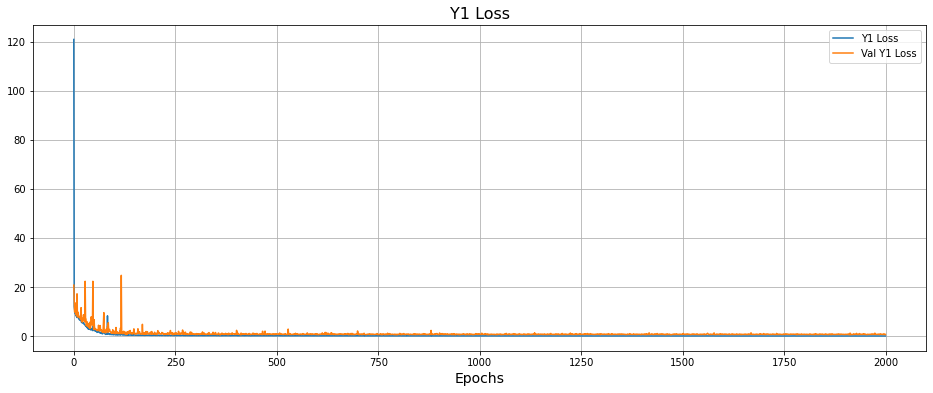

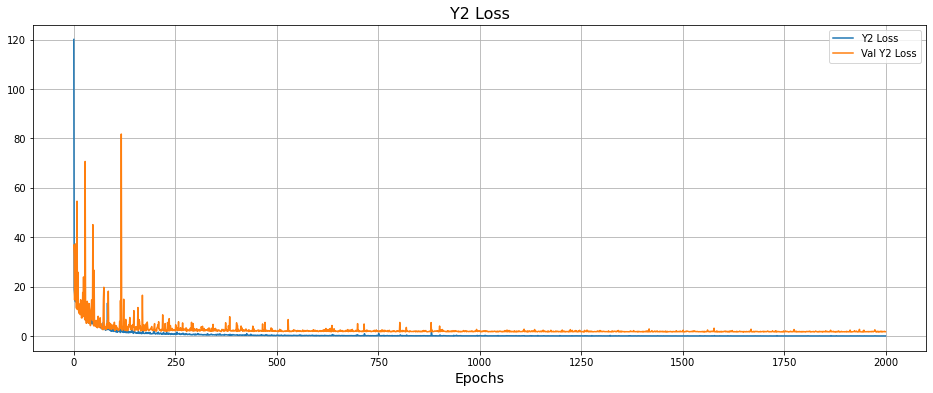

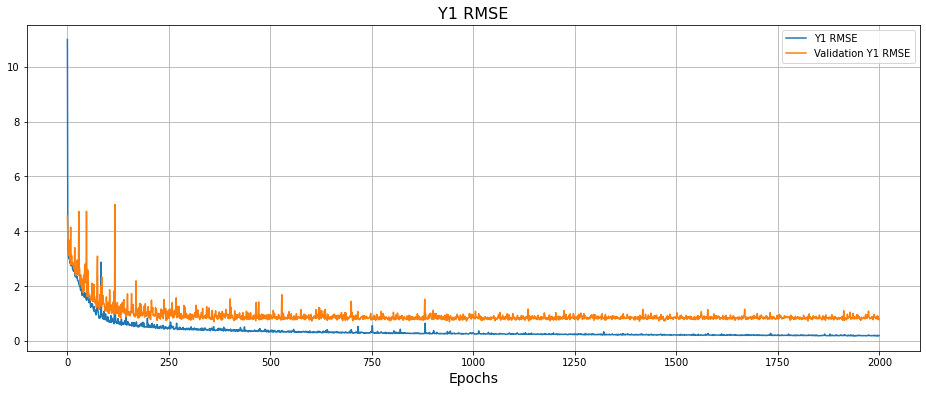

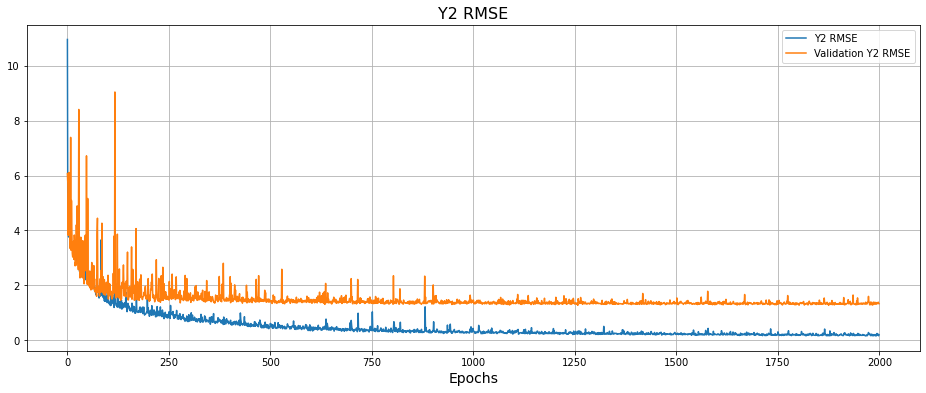

In [24]:
plot_line(y1_output_loss, val_y1_output_loss, title ="Y1 Loss", label1 = "Y1 Loss", label2 = "Val Y1 Loss")
plot_line(y2_output_loss, val_y2_output_loss, title ="Y2 Loss", label1 = "Y2 Loss", label2 = "Val Y2 Loss")
plot_line(y1_output_rmse, val_y1_output_rmse, title ="Y1 RMSE", label1 = "Y1 RMSE", label2 = "Validation Y1 RMSE")
plot_line(y2_output_rmse, val_y2_output_rmse, title ="Y2 RMSE", label1 = "Y2 RMSE", label2 = "Validation Y2 RMSE")

In [25]:
Y1_pred , Y2_pred = model.predict(x_test_norm)

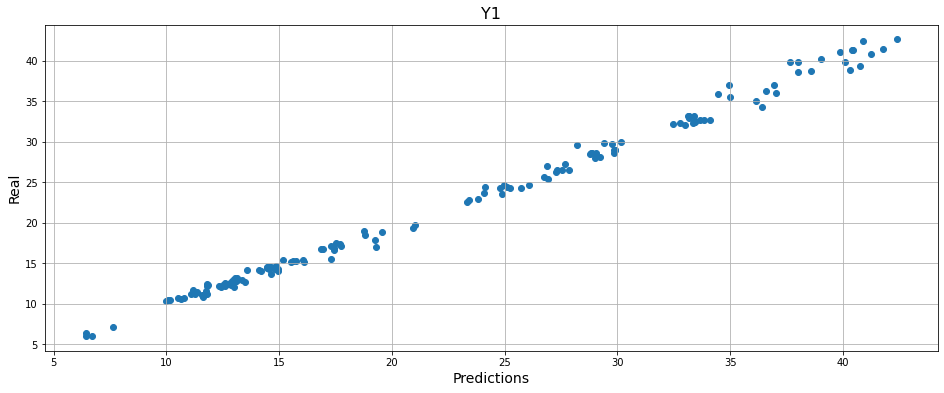

In [26]:
scatter_plot(Y1_test, Y1_pred, "Y1")

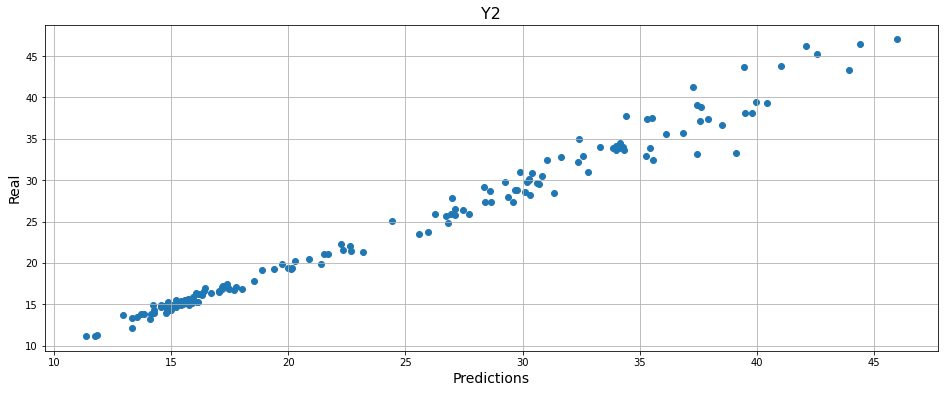

In [27]:
scatter_plot(Y2_test, Y2_pred, "Y2")

In [28]:
#saving the model
model.save("multi-target-regressor")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: multi-target-regressor/assets


assets/  saved_model.pb  variables/
